# Task 5.4: Complete a Data Science Capstone Project

## Importar Librerias

In [352]:
import datetime
from dateutil.relativedelta import relativedelta
import tensorflow
import seaborn as sns 
import scipy
from datetime import datetime, timedelta,date
import pandas as pd
from pandas import Grouper
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from math import sqrt, exp
from statistics import mean
import statsmodels.api as sm

from dateutil.relativedelta import relativedelta

import warnings
#warnings.filterwarnings("ignore")

import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM


# Importar tensorflow
import tensorflow as tf

# Importar statsmodels.formula.api
import statsmodels.formula.api as smf

#model metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

#cross validation
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#get your parameters right
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.api import ProbPlot
from statsmodels.graphics import tsaplots
from statsmodels.stats.stattools import jarque_bera as jb
from statsmodels.stats.diagnostic import acorr_ljungbox as lb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from scipy import stats
from scipy.stats import kstest, boxcox, gaussian_kde, norm

In [353]:
#iniciar trama
pyoff.init_notebook_mode()

## Extraer Conjunto de Datos

In [354]:
#leer los datos en csv
df_primas = pd.read_csv('/Users/ariasrodriguez/Documents/GitHub/Data_Analytics-Big_Data/Task 5.4/Anexos/mercadoPrimaMensual.csv')
df_primas.columns = ['fecha','codLinea','codAseguradora','primaMensual']
df_primas.head(10)

fecha  codLinea  codAseguradora  primaMensual
0  2010-01-01 00:00:00.000        10               1     9230.6989
1  2010-01-01 00:00:00.000         4               1     4627.3145
2  2010-01-01 00:00:00.000         4               4       42.7470
3  2010-01-01 00:00:00.000        18               1      115.2261
4  2010-01-01 00:00:00.000        19               1     2033.5397
5  2010-01-01 00:00:00.000        12               1        5.5203
6  2010-01-01 00:00:00.000         8               1     4076.6290
7  2010-01-01 00:00:00.000         3               1       16.9358
8  2010-01-01 00:00:00.000        17               1     1283.8624
9  2010-01-01 00:00:00.000        13               1    -1087.2790

### Depurar datos de fecha en el conjunto de datos
#### Es importante que al campo "fecha" le demos formato datetime

In [355]:
#convertir campo de fecha de cadena a fecha y hora
df_primas['fecha'] = pd.to_datetime(df_primas['fecha'])
df_primas.head(10)

fecha  codLinea  codAseguradora  primaMensual
0 2010-01-01        10               1     9230.6989
1 2010-01-01         4               1     4627.3145
2 2010-01-01         4               4       42.7470
3 2010-01-01        18               1      115.2261
4 2010-01-01        19               1     2033.5397
5 2010-01-01        12               1        5.5203
6 2010-01-01         8               1     4076.6290
7 2010-01-01         3               1       16.9358
8 2010-01-01        17               1     1283.8624
9 2010-01-01        13               1    -1087.2790

### Exploremos un poco nuestro conjunto de datos 

In [356]:
df_primas[['fecha', 'codLinea', 'codAseguradora','primaMensual']].describe()

codLinea  codAseguradora   primaMensual
count  7257.000000     7257.000000    7257.000000
mean     10.238391        5.419319     959.806042
std       5.610860        4.119544    3988.200266
min       1.000000        1.000000  -31924.013800
25%       5.000000        1.000000      15.304600
50%      10.000000        4.000000     105.590000
75%      15.000000        9.000000     501.325900
max      24.000000       14.000000  159360.781359

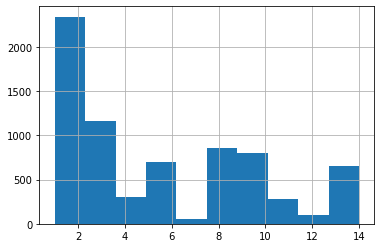

In [8]:
df_primas.codAseguradora.hist()

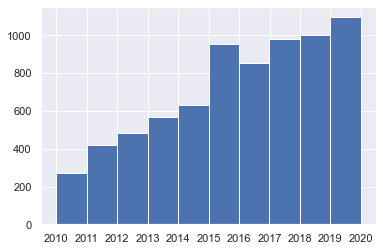

In [357]:
df_primas.fecha.hist()

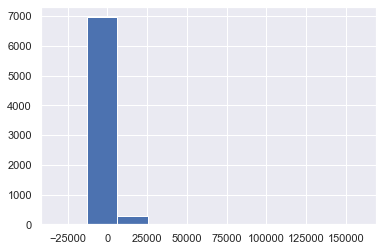

In [358]:
df_primas.primaMensual.hist()

### Trabajaremos varios dataframe para cada una de las aseguradoras 
#### Es necesario que a nuestro conjunto de datos los separemos por cada aseguradora

In [359]:
isAseguradora1 = df_primas.codAseguradora == 1
isAseguradora2 = df_primas.codAseguradora == 2
isAseguradora3 = df_primas.codAseguradora == 3
isAseguradora4 = df_primas.codAseguradora == 4
isAseguradora5 = df_primas.codAseguradora == 5
isAseguradora6 = df_primas.codAseguradora == 6
isAseguradora7 = df_primas.codAseguradora == 7
isAseguradora8 = df_primas.codAseguradora == 8
isAseguradora9 = df_primas.codAseguradora == 9
isAseguradora10 = df_primas.codAseguradora == 10
isAseguradora11 = df_primas.codAseguradora == 11
isAseguradora12 = df_primas.codAseguradora == 12
isAseguradora13 = df_primas.codAseguradora == 13
isAseguradora14 = df_primas.codAseguradora == 14
df_Aseguradora1 = df_primas[isAseguradora1].copy()
df_Aseguradora2 = df_primas[isAseguradora2].copy()
df_Aseguradora3 = df_primas[isAseguradora3].copy()
df_Aseguradora4 = df_primas[isAseguradora4].copy()
df_Aseguradora5 = df_primas[isAseguradora5].copy()
df_Aseguradora6 = df_primas[isAseguradora6].copy()
df_Aseguradora7 = df_primas[isAseguradora7].copy()
df_Aseguradora8 = df_primas[isAseguradora8].copy()
df_Aseguradora9 = df_primas[isAseguradora9].copy()
df_Aseguradora10 = df_primas[isAseguradora10].copy()
df_Aseguradora11 = df_primas[isAseguradora11].copy()
df_Aseguradora12 = df_primas[isAseguradora12].copy()
df_Aseguradora13 = df_primas[isAseguradora13].copy()
df_Aseguradora14 = df_primas[isAseguradora13].copy()
print('Aseguradora #1: ',str(len(df_Aseguradora1.index)))
print('Aseguradora #2: ',str(len(df_Aseguradora2.index)))
print('Aseguradora #3: ',str(len(df_Aseguradora3.index)))
print('Aseguradora #4: ',str(len(df_Aseguradora4.index)))
print('Aseguradora #5: ',str(len(df_Aseguradora5.index)))
print('Aseguradora #6: ',str(len(df_Aseguradora6.index)))
print('Aseguradora #7: ',str(len(df_Aseguradora7.index)))
print('Aseguradora #8: ',str(len(df_Aseguradora8.index)))
print('Aseguradora #9: ',str(len(df_Aseguradora9.index)))
print('Aseguradora #10: ',str(len(df_Aseguradora10.index)))
print('Aseguradora #11: ',str(len(df_Aseguradora11.index)))
print('Aseguradora #12: ',str(len(df_Aseguradora12.index)))
print('Aseguradora #13: ',str(len(df_Aseguradora13.index)))
print('Aseguradora #14: ',str(len(df_Aseguradora14.index)))

Aseguradora #1:  1868
Aseguradora #2:  474
Aseguradora #3:  1157
Aseguradora #4:  303
Aseguradora #5:  204
Aseguradora #6:  499
Aseguradora #7:  58
Aseguradora #8:  857
Aseguradora #9:  553
Aseguradora #10:  245
Aseguradora #11:  281
Aseguradora #12:  104
Aseguradora #13:  369
Aseguradora #14:  369


### Transformación de los datos
#### Vamos a agrupar cada uno de los dataframe por días, y sumado los montos de las primas
##### Para esté proyecto analizaremos las 3 con mayor cantidad de datos 

In [360]:
### 1

#representa el mes en el campo de fecha como su primer día
df_Aseguradora1['fecha'] = df_Aseguradora1['fecha'].dt.year.astype('str') + '-' + df_Aseguradora1['fecha'].dt.month.astype('str') + '-01'
df_Aseguradora1['fecha'] = pd.to_datetime(df_Aseguradora1['fecha'])
#fecha grupal y suma las ventas
df_Aseguradora1 = df_Aseguradora1.groupby('fecha').primaMensual.sum().reset_index()

### 3

#representa el mes en el campo de fecha como su primer día
df_Aseguradora3['fecha'] = df_Aseguradora3['fecha'].dt.year.astype('str') + '-' + df_Aseguradora3['fecha'].dt.month.astype('str') + '-01'
df_Aseguradora3['fecha'] = pd.to_datetime(df_Aseguradora3['fecha'])
#fecha grupal y suma las ventas
df_Aseguradora3 = df_Aseguradora3.groupby('fecha').primaMensual.sum().reset_index()

### 8

#representa el mes en el campo de fecha como su primer día
df_Aseguradora8['fecha'] = df_Aseguradora8['fecha'].dt.year.astype('str') + '-' + df_Aseguradora8['fecha'].dt.month.astype('str') + '-01'
df_Aseguradora8['fecha'] = pd.to_datetime(df_Aseguradora8['fecha'])
#fecha grupal y suma las ventas
df_Aseguradora8 = df_Aseguradora8.groupby('fecha').primaMensual.sum().reset_index()

In [361]:
df_Aseguradora1.head(10)

fecha  primaMensual
0 2010-01-01    22078.1727
1 2010-02-01    39191.8354
2 2010-03-01    26157.2038
3 2010-04-01    21252.8475
4 2010-05-01    32199.6088
5 2010-06-01    30503.4787
6 2010-07-01    29581.1155
7 2010-08-01    31419.6212
8 2010-09-01    23001.3942
9 2010-10-01    23719.4476

In [16]:
df_Aseguradora3.head(10)

fecha  primaMensual
0 2010-08-01       25.0903
1 2010-09-01      153.9169
2 2010-10-01       45.2177
3 2010-11-01      384.7594
4 2010-12-01     1704.7812
5 2011-01-01       30.5000
6 2011-02-01      597.2150
7 2011-03-01      589.0649
8 2011-04-01      873.2372
9 2011-05-01      750.8528

In [17]:
df_Aseguradora8.head(10)

fecha  primaMensual
0 2010-05-01        0.5538
1 2010-06-01        3.5481
2 2010-07-01        7.5186
3 2010-08-01       19.1176
4 2010-09-01       41.0117
5 2010-10-01       65.9348
6 2010-11-01      135.2274
7 2010-12-01      110.3870
8 2011-01-01      175.7632
9 2011-02-01      714.4750

#### Verificamos si los datos no son estacionarios

In [362]:
#trazar ventas mensuales
plot_data = [
    go.Scatter(
        x=df_Aseguradora1['fecha'],
        y=df_Aseguradora1['primaMensual'],
    )
]
plot_layout = go.Layout(
        title='Primas mensuales aseguradora 1'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [22]:
#trazar ventas mensuales
plot_data = [
    go.Scatter(
        x=df_Aseguradora3['fecha'],
        y=df_Aseguradora3['primaMensual'],
    )
]
plot_layout = go.Layout(
        title='Primas mensuales Aseguradora 3'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [23]:
#trazar ventas mensuales
plot_data = [
    go.Scatter(
        x=df_Aseguradora8['fecha'],
        y=df_Aseguradora8['primaMensual'],
    )
]
plot_layout = go.Layout(
        title='Primas mensuales Aseguradora 8'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

##### Observamos que el comportamiento es muy distinto para cada una de las aseguradora 

## Preparación de datos
### Crear series de tiempo
#### es necesario asignar el indice al campo fecha

In [363]:
### 1

ts_df1 = df_Aseguradora1.copy()
ts_df1['index'] = pd.to_datetime(ts_df1['fecha'])
ts_df1.set_index('index', inplace = True)
ts_df1.drop(["fecha"], axis = 1, inplace = True) # Serie como pd.DataFrame
ts1 = ts_df1.iloc[:,0] # Serie como pd.Series

### 3

ts_df3 = df_Aseguradora3.copy()
ts_df3['index'] = pd.to_datetime(ts_df3['fecha'])
ts_df3.set_index('index', inplace = True)
ts_df3.drop(["fecha"], axis = 1, inplace = True) # Serie como pd.DataFrame
ts3 = ts_df3.iloc[:,0] # Serie como pd.Series

### 8

ts_df8 = df_Aseguradora8.copy()
ts_df8['index'] = pd.to_datetime(ts_df8['fecha'])
ts_df8.set_index('index', inplace = True)
ts_df8.drop(["fecha"], axis = 1, inplace = True) # Serie como pd.DataFrame
ts8 = ts_df8.iloc[:,0] # Serie como pd.Series

In [364]:
ts_df1.head().values

array([[22078.1727],
       [39191.8354],
       [26157.2038],
       [21252.8475],
       [32199.6088]])

In [365]:
ts_df3.head().values

array([[  25.0903],
       [ 153.9169],
       [  45.2177],
       [ 384.7594],
       [1704.7812]])

In [27]:
ts_df8.head().values

array([[ 0.5538],
       [ 3.5481],
       [ 7.5186],
       [19.1176],
       [41.0117]])

##### Pandas representa conjuntos de datos de series de tiempo como una Serie. Una serie es una matriz unidimensional con una etiqueta de tiempo para cada fila.

In [366]:
### 1

# create a time series
s1 = pd.Series(ts_df1.unstack().values, index=ts_df1.index)

### 3

# create a time series
s3 = pd.Series(ts_df3.unstack().values, index=ts_df3.index)

### 8

# create a time series
s8 = pd.Series(ts_df8.unstack().values, index=ts_df8.index)

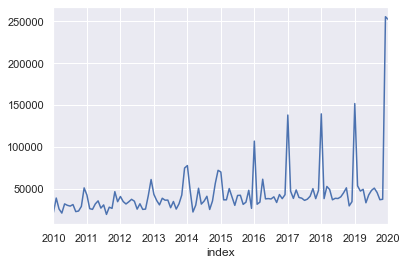

In [367]:
# basic plot
s1.plot()

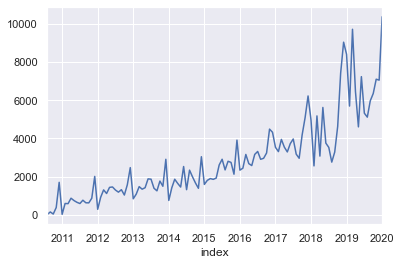

In [368]:
# basic plot
s3.plot()

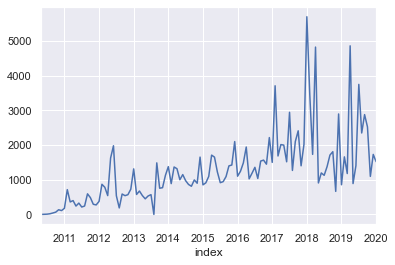

In [369]:
# basic plot
s8.plot()

In [370]:
# consultar un conjunto de datos utilizando un índice de fecha
s1 = s1['2014-01':'2020-01']
s1

index
2014-01-01     77921.536200
2014-02-01     48212.721100
2014-03-01     22552.409100
2014-04-01     30694.594100
2014-05-01     50872.215200
                  ...      
2019-09-01     45805.114000
2019-10-01     37191.220200
2019-11-01     37705.778100
2019-12-01    255432.615892
2020-01-01    252123.202001
Length: 73, dtype: float64

In [371]:
s3 = s3['2014-01':'2020-01']
s3

index
2014-01-01      756.893300
2014-02-01     1412.850000
2014-03-01     1866.007100
2014-04-01     1648.860500
2014-05-01     1457.721900
                  ...     
2019-09-01     5972.804800
2019-10-01     6354.312500
2019-11-01     7102.490300
2019-12-01     7054.220553
2020-01-01    10372.403572
Length: 73, dtype: float64

In [372]:
s8 = s8['2014-01':'2020-01']
s8

index
2014-01-01    1377.826800
2014-02-01     888.189400
2014-03-01    1368.513500
2014-04-01    1318.385700
2014-05-01    1001.069000
                 ...     
2019-09-01    2879.661400
2019-10-01    2525.768800
2019-11-01    1097.123300
2019-12-01    1730.671097
2020-01-01    1520.996231
Length: 73, dtype: float64

## Ingeniería de carácteristicas básicas
##### Es necesario transformar el dataframe como un problema de aprendizaje supervisado.
### Características de fecha y hora
##### Las características más simples que podemos usar son las características de la fecha / hora de cada observación.

In [373]:
### 1

df1 = pd.DataFrame()
df1['year'] = [s1.index[i].year for i in range(len(s1))]
df1['month'] = [s1.index[i].month for i in range(len(s1))]
df1['value'] = s1.values.tolist()

### 3

df3 = pd.DataFrame()
df3['year'] = [s3.index[i].year for i in range(len(s3))]
df3['month'] = [s3.index[i].month for i in range(len(s3))]
df3['value'] = s3.values.tolist()

### 8

df8 = pd.DataFrame()
df8['year'] = [s8.index[i].year for i in range(len(s8))]
df8['month'] = [s8.index[i].month for i in range(len(s8))]
df8['value'] = s8.values.tolist()

##### La serie de tiempo temporales sean transfordo en problemas de aprendizaje supervisado. 
##### Para esto vamos a predecir el valor de la próxima vez (t + 1) dado el valor en el momento actual (t). 

In [374]:
### 1

values1 = pd.DataFrame(s1.values)
df1 = pd.concat([values1.shift(1), values1], axis=1)
df1.columns = ['t', 't+1']

### 3

values3 = pd.DataFrame(s3.values)
df3 = pd.concat([values3.shift(1), values3], axis=1)
df3.columns = ['t', 't+1']

### 8

values8 = pd.DataFrame(s8.values)
df8 = pd.concat([values8.shift(1), values8], axis=1)
df8.columns = ['t', 't+1']

In [53]:
df1.head()

t         t+1
0         NaN  77921.5362
1  77921.5362  48212.7211
2  48212.7211  22552.4091
3  22552.4091  30694.5941
4  30694.5941  50872.2152

In [54]:
df3.head()

t        t+1
0        NaN   756.8933
1   756.8933  1412.8500
2  1412.8500  1866.0071
3  1866.0071  1648.8605
4  1648.8605  1457.7219

In [55]:
df8.head()

t        t+1
0        NaN  1377.8268
1  1377.8268   888.1894
2   888.1894  1368.5135
3  1368.5135  1318.3857
4  1318.3857  1001.0690

### WIndow Features
##### La adición de características de retraso se llama el método de ventana deslizante, en este caso con un ancho de ventana de 1.
##### Es como si estuviéramos deslizando nuestro enfoque a lo largo de la serie de tiempo para cada observación con interés solo en lo que está dentro del ancho de la ventana.
##### Podemos expandir el ancho de la ventana e incluir más características rezagadas.

In [62]:
### 1

values1 = pd.DataFrame(s1.values)
df1 = pd.concat([values1.shift(3), values1.shift(2), values1.shift(1), values1], axis=1)
df1.columns = ['t-2', 't-1', 't', 't+1']

### 3

values3 = pd.DataFrame(s3.values)
df3 = pd.concat([values3.shift(3), values3.shift(2), values3.shift(1), values3], axis=1)
df3.columns = ['t-2', 't-1', 't', 't+1']

### 8

values8 = pd.DataFrame(s8.values)
df8 = pd.concat([values8.shift(3), values8.shift(2), values8.shift(1), values8], axis=1)
df8.columns = ['t-2', 't-1', 't', 't+1']

In [63]:
df1.head()

t-2         t-1           t         t+1
0         NaN         NaN         NaN  77921.5362
1         NaN         NaN  77921.5362  48212.7211
2         NaN  77921.5362  48212.7211  22552.4091
3  77921.5362  48212.7211  22552.4091  30694.5941
4  48212.7211  22552.4091  30694.5941  50872.2152

In [64]:
df3.head()

t-2        t-1          t        t+1
0        NaN        NaN        NaN   756.8933
1        NaN        NaN   756.8933  1412.8500
2        NaN   756.8933  1412.8500  1866.0071
3   756.8933  1412.8500  1866.0071  1648.8605
4  1412.8500  1866.0071  1648.8605  1457.7219

In [65]:
df8.head()

t-2        t-1          t        t+1
0        NaN        NaN        NaN  1377.8268
1        NaN        NaN  1377.8268   888.1894
2        NaN  1377.8268   888.1894  1368.5135
3  1377.8268   888.1894  1368.5135  1318.3857
4   888.1894  1368.5135  1318.3857  1001.0690

### Rolling Window Statistics

##### Podemos calcular estadísticas de resumen a través de los valores en la ventana deslizante e incluirlos como características en nuestro conjunto de datos. 
##### Quizás lo más útil sea la media de los valores anteriores, también llamada rolling mean.
##### Calculamos la media de los dos valores anteriores y usarla para predecir el siguiente valor. 

In [66]:
### 1

values = pd.DataFrame(s1.values)
shifted = values.shift(1)
window = shifted.rolling(window=2)
means = window.mean()

df1 = pd.concat([means, values], axis=1)
df1.columns = ['mean(t-1,t)', 't+1']

### 3

values = pd.DataFrame(s3.values)
shifted = values.shift(1)
window = shifted.rolling(window=2)
means = window.mean()

df3 = pd.concat([means, values], axis=1)
df3.columns = ['mean(t-1,t)', 't+1']

### 8

values = pd.DataFrame(s8.values)
shifted = values.shift(1)
window = shifted.rolling(window=2)
means = window.mean()

df8 = pd.concat([means, values], axis=1)
df8.columns = ['mean(t-1,t)', 't+1']

In [67]:
df1.head()

mean(t-1,t)         t+1
0          NaN  77921.5362
1          NaN  48212.7211
2  63067.12865  22552.4091
3  35382.56510  30694.5941
4  26623.50160  50872.2152

In [68]:
df3.head()

mean(t-1,t)        t+1
0          NaN   756.8933
1          NaN  1412.8500
2   1084.87165  1866.0071
3   1639.42855  1648.8605
4   1757.43380  1457.7219

In [69]:
df8.head()

mean(t-1,t)        t+1
0          NaN  1377.8268
1          NaN   888.1894
2   1133.00810  1368.5135
3   1128.35145  1318.3857
4   1343.44960  1001.0690

In [70]:
### 1

values = pd.DataFrame(s1.values)
width = 3
shifted = values.shift(width - 1)
window = shifted.rolling(window=width)

df1 = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df1.columns = ['min', 'mean', 'max', 't+1']

### 3

values = pd.DataFrame(s3.values)
width = 3
shifted = values.shift(width - 1)
window = shifted.rolling(window=width)

df3 = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df3.columns = ['min', 'mean', 'max', 't+1']

### 8

values = pd.DataFrame(s8.values)
width = 3
shifted = values.shift(width - 1)
window = shifted.rolling(window=width)

df8 = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df8.columns = ['min', 'mean', 'max', 't+1']

In [71]:
df1.head()

min          mean         max         t+1
0         NaN           NaN         NaN  77921.5362
1         NaN           NaN         NaN  48212.7211
2         NaN           NaN         NaN  22552.4091
3         NaN           NaN         NaN  30694.5941
4  22552.4091  49562.222133  77921.5362  50872.2152

In [72]:
df3.head()

min         mean        max        t+1
0       NaN          NaN        NaN   756.8933
1       NaN          NaN        NaN  1412.8500
2       NaN          NaN        NaN  1866.0071
3       NaN          NaN        NaN  1648.8605
4  756.8933  1345.250133  1866.0071  1457.7219

In [73]:
df8.head()

min       mean        max        t+1
0       NaN        NaN        NaN  1377.8268
1       NaN        NaN        NaN   888.1894
2       NaN        NaN        NaN  1368.5135
3       NaN        NaN        NaN  1318.3857
4  888.1894  1211.5099  1377.8268  1001.0690

### Expanding Window Statistics
##### Otro tipo de Window que puede ser útil incluye todos los datos anteriores de la serie. 
##### Esto se denomina Expanding Window y puede ayudar a realizar un seguimiento de los límites de los datos observables.

In [74]:
### 1

values = pd.DataFrame(s1.values)
window = values.expanding()

df1 = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df1.columns = ['min', 'mean', 'max', 't+1']

### 3

values = pd.DataFrame(s3.values)
window = values.expanding()

df3 = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df3.columns = ['min', 'mean', 'max', 't+1']

### 8

values = pd.DataFrame(s8.values)
window = values.expanding()

df8 = pd.concat([window.min(), window.mean(), window.max(), values], axis=1)
df8.columns = ['min', 'mean', 'max', 't+1']

In [75]:
df1.head()

min          mean         max         t+1
0  77921.5362  77921.536200  77921.5362  77921.5362
1  48212.7211  63067.128650  77921.5362  48212.7211
2  22552.4091  49562.222133  77921.5362  22552.4091
3  22552.4091  44845.315125  77921.5362  30694.5941
4  22552.4091  46050.695140  77921.5362  50872.2152

In [77]:
df1.tail()

min          mean            max            t+1
68  22552.4091  47778.769133  151868.212500   45805.114000
69  22552.4091  47627.518434  151868.212500   37191.220200
70  22552.4091  47487.775613  151868.212500   37705.778100
71  22552.4091  50375.898394  255432.615892  255432.615892
72  22552.4091  53139.560088  255432.615892  252123.202001

## Visualización de datos
##### La visualización más popular para series de tiempo es el diagrama lineal
##### El tiempo se muestra en el eje x con valores de observación a lo largo del eje y

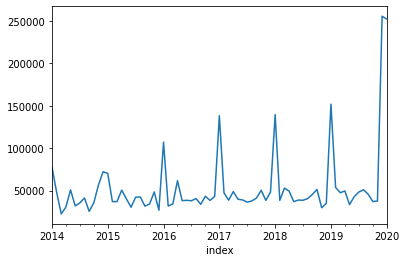

In [78]:
s1.plot()

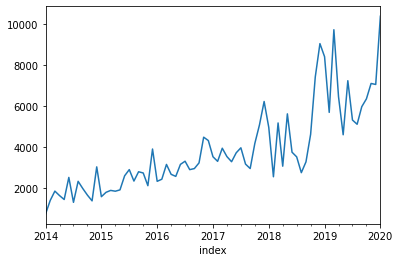

In [80]:
s3.plot()

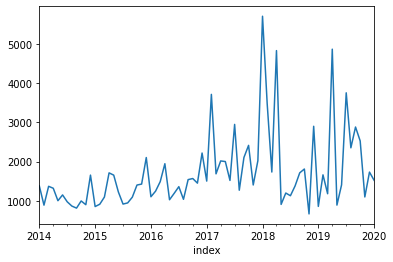

In [81]:
s8.plot()

#### Gráficos de histograma 

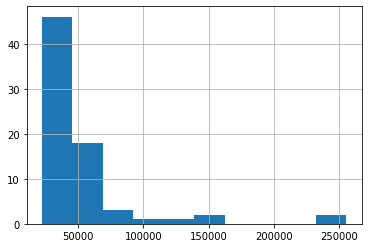

In [82]:
s1.hist()

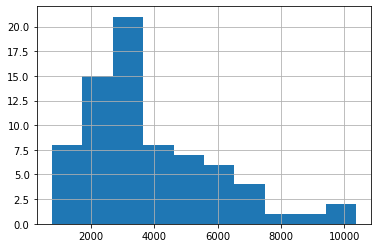

In [83]:
s3.hist()

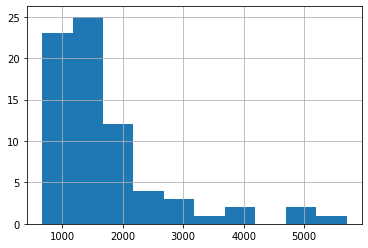

In [84]:
s8.hist()

#### Box and Whisker Plots
##### Los puntos se dibujan para valores atípicos fuera de los bigotes o extensiones de los datos

In [85]:
### 1

years, index = [], []
for name, gr in s1.groupby(Grouper(freq='A')):
    years.append(gr.values)
    index.append(name.year)
df1 = pd.DataFrame(years, index=index, columns=range(1,13))

### 3

years, index = [], []
for name, gr in s3.groupby(Grouper(freq='A')):
    years.append(gr.values)
    index.append(name.year)
df3 = pd.DataFrame(years, index=index, columns=range(1,13))

### 8

years, index = [], []
for name, gr in s8.groupby(Grouper(freq='A')):
    years.append(gr.values)
    index.append(name.year)
df8 = pd.DataFrame(years, index=index, columns=range(1,13))

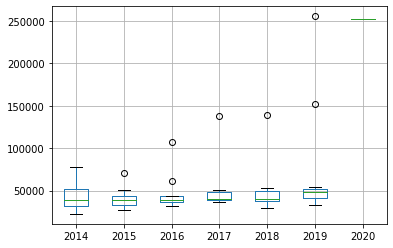

In [86]:
df1.tail(10).T.boxplot()

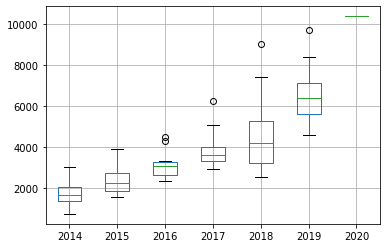

In [87]:
df3.tail(10).T.boxplot()

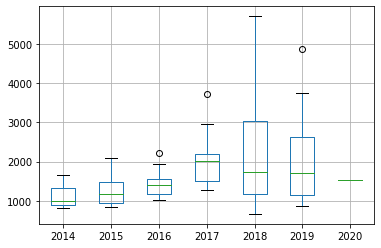

In [88]:
df8.tail(10).T.boxplot()

#### Gráficos de autocorrelación
##### Podemos cuantificar la fuerza y el tipo de relación entre las observaciones y sus retrasos.

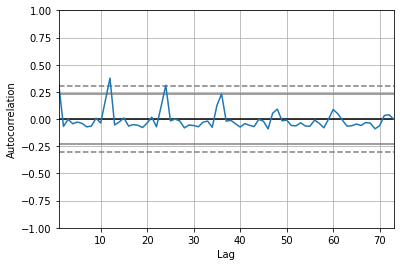

In [89]:
autocorrelation_plot(s1)

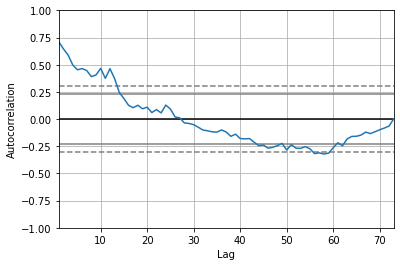

In [90]:
autocorrelation_plot(s3)

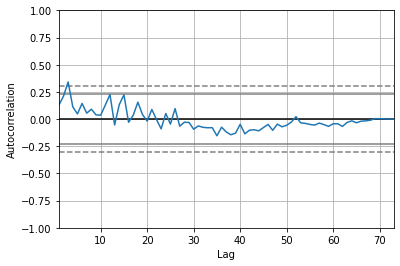

In [91]:
autocorrelation_plot(s8)

### Moving Average Smoothing
##### Es una técnica ingenua y efectiva en el pronóstico de series de tiempo. 
##### Podemos usarla para preparar de datos, ingeniería de características e incluso directamente para hacer predicciones. 
##### Es una técnica aplicada a series de tiempo para eliminar la variación de grano fino entre los pasos de tiempo. 
##### Es importante porque eliminamos el ruido y exponer mejor la señal de los procesos causales subyacentes.

In [92]:
### 1
# tail-rolling average transform
rolling = s1.rolling(window=3)
rolling_mean1 = rolling.mean()
### 1
# tail-rolling average transform
rolling = s3.rolling(window=3)
rolling_mean3 = rolling.mean()
### 1
# tail-rolling average transform
rolling = s8.rolling(window=3)
rolling_mean8 = rolling.mean()

In [93]:
rolling_mean1.head(10)

index
2014-01-01             NaN
2014-02-01             NaN
2014-03-01    49562.222133
2014-04-01    33819.908100
2014-05-01    34706.406133
2014-06-01    37849.053700
2014-07-01    39463.732700
2014-08-01    36278.989667
2014-09-01    34137.120067
2014-10-01    34175.219867
dtype: float64

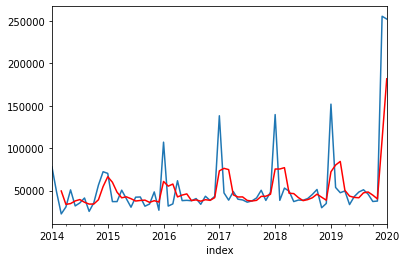

In [94]:
# plot original and transformed dataset
s1[-100:].plot()
rolling_mean1[-100:].plot(color='red')

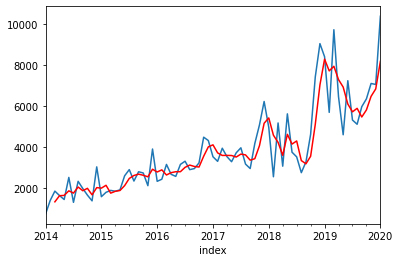

In [95]:
# plot original and transformed dataset
s3[-100:].plot()
rolling_mean3[-100:].plot(color='red')

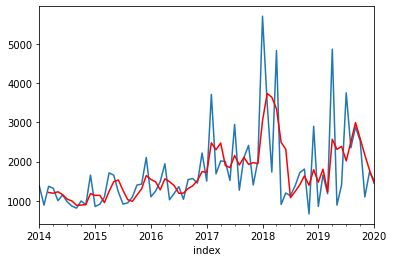

In [96]:
# plot original and transformed dataset
s8[-100:].plot()
rolling_mean8[-100:].plot(color='red')

### Moving Average as Prediction
##### El valor promedio moviente también se puede usar directamente para hacer predicciones. 
##### Es un modelo ingenuo y supone que los componentes de tendencia y estacionalidad de las series de tiempo ya se han eliminado o ajustado. 
##### The moving average model para las predicciones se puede usar fácilmente de manera progresiva. A medida que se ponen a disposición nuevas observaciones (por ejemplo, diariamente), el modelo se puede actualizar y hacer una predicción para el día siguiente.

In [113]:
### 1

# prepare problem
X = s1.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# caminar hacia adelante con el tiempo pasos en la prueba
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse1 = np.sqrt(mean_squared_error(test, predictions))
test1 = test.copy()
predictions1 = predictions.copy()
print('RMSE: %.3f' % rmse1)

RMSE: 41036.361


In [112]:
### 3

# prepare problem
X = s3.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# caminar hacia adelante con el tiempo pasos en la prueba
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse3 = np.sqrt(mean_squared_error(test, predictions))
test3 = test.copy()
predictions3 = predictions.copy()
print('RMSE: %.3f' % rmse3)

RMSE: 1249.137


In [111]:
### 8

# prepare problem
X = s8.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# caminar hacia adelante con el tiempo pasos en la prueba
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse8 = np.sqrt(mean_squared_error(test, predictions))
test8 = test.copy()
predictions8 = predictions.copy()
print('RMSE: %.3f' % rmse8)

RMSE: 984.419


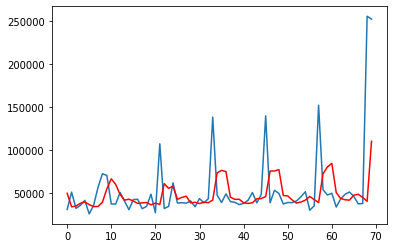

In [114]:
# plot
plt.plot(test1)
plt.plot(predictions1, color='red')
plt.show()

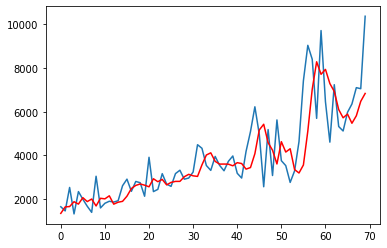

In [116]:
# plot
plt.plot(test3)
plt.plot(predictions3, color='red')
plt.show()

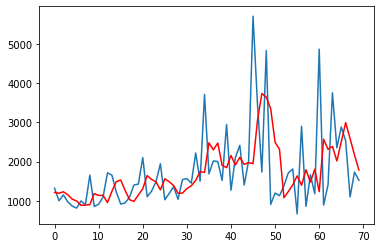

In [117]:
# plot
plt.plot(test8)
plt.plot(predictions8, color='red')
plt.show()

## Time Series Components
#### Podemos dividir una serie de tiempo en componentes sistemáticos y no sistemáticos
##### Sistemática: componentes de las series de tiempo que tienen consistencia o recurrencia y pueden describirse y modelarse.
##### No sistemático: componentes de la serie temporal que no se pueden modelar directamente.
#### La serie temporal dada consta de tres componentes sistemáticos:
##### (Nivel,tendencia, estacionalidad y un componente no sistemático llamado ruido)
##### Los conjuntos de datos de series temporales pueden contener una tendencia
##### Una serie temporal tiene una tendencia o eliminamos con éxito la tendencia se llama estacional
### Estacionariedad en datos de series temporales

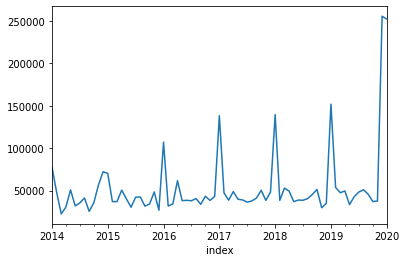

In [118]:
s1.plot()

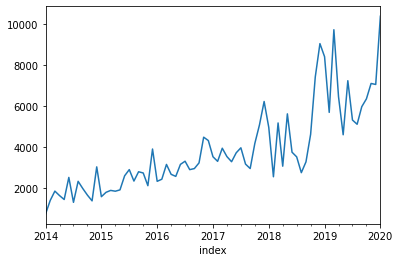

In [119]:
s3.plot()

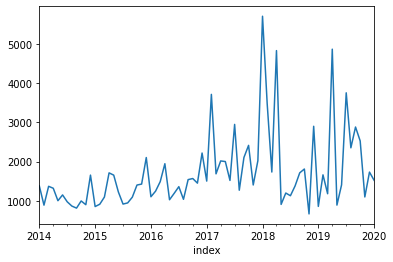

In [120]:
s8.plot()

### Augmented Dickey-Fuller test
##### La prueba de Dickey-Fuller aumentada es un tipo de prueba estadística llamada unit root test.
##### Determina qué tan fuertemente una serie temporal, definida por una tendencia. 
##### Utiliza un modelo autorregresivo y optimiza un criterio de información en múltiples valores de retraso diferentes. 

In [121]:
# calcular la prueba de estacionariedad de datos de series temporales
X = s1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.778104
p-value: 0.991274
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593


In [125]:
##### No podemos rechazar la hipótesis nula con un nivel de significancia.
##### La serie temporal puede no ser estacionaria o no tiene una estructura dependiente del tiempo.

In [122]:
# calcular la prueba de estacionariedad de datos de series temporales
X = s3.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.671662
p-value: 0.998057
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593


##### No podemos rechazar la hipótesis nula con un nivel de significancia.
##### La serie temporal puede no ser estacionaria o no tiene una estructura dependiente del tiempo.

In [123]:
# calcular la prueba de estacionariedad de datos de series temporales
X = s8.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.836968
p-value: 0.053184
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589


##### No podemos rechazar la hipótesis nula con un nivel de significancia inferior al 5%
##### La serie temporal puede no ser estacionaria o no tiene una estructura dependiente del tiempo.

## Evaluar modelos
#### Usaremos tres métodos diferentes para usar backtest en sus modelos machine learning models en series de tiempo 
##### 1-Train-Test split que respeta el orden temporal de las observaciones.
##### 2-Multiple Train-Test splits respetan el orden temporal de las observaciones.
##### 3-VWalk-Forward Validation  un modelo puede actualizarse cada vez que se reciben nuevos datos.
### Split de entrenamiento - pruebas

In [127]:
### 1

# calcular una división pruena-entrenamiento de un conjunto de datos de series de tiempo
X = s1.values
train_size = int(len(X) * 0.66)
train1, test1 = X[0:train_size], X[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train1)))
print('Testing Observations: %d' % (len(test1)))
print('**************************')

### 3

# calcular una división pruena-entrenamiento de un conjunto de datos de series de tiempo
X = s3.values
train_size = int(len(X) * 0.66)
train3, test3 = X[0:train_size], X[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train3)))
print('Testing Observations: %d' % (len(test3)))
print('**************************')

### 8

# calcular una división pruena-entrenamiento de un conjunto de datos de series de tiempo
X = s8.values
train_size = int(len(X) * 0.66)
train8, test8 = X[0:train_size], X[train_size:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train8)))
print('Testing Observations: %d' % (len(test8)))

Observations: 73
Training Observations: 48
Testing Observations: 25
**************************
Observations: 73
Training Observations: 48
Testing Observations: 25
**************************
Observations: 73
Training Observations: 48
Testing Observations: 25


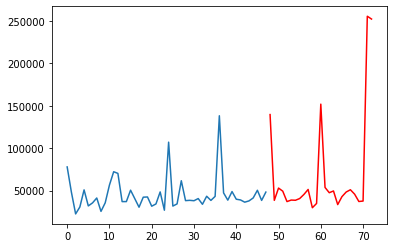

In [128]:
# plot train-test split of time series data
plt.plot(train1)
plt.plot([None for i in train1] + [x for x in test1], color='r')

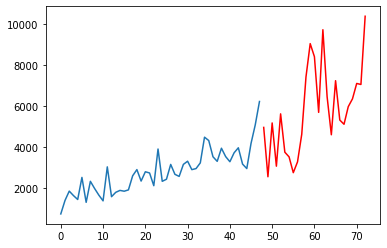

In [129]:
# plot train-test split of time series data
plt.plot(train3)
plt.plot([None for i in train3] + [x for x in test3], color='r')

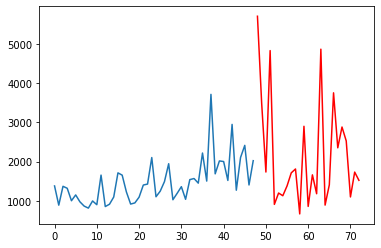

In [130]:
# plot train-test split of time series data
plt.plot(train8)
plt.plot([None for i in train8] + [x for x in test8], color='r')

### Multiple Train-Test Splits

##### La biblioteca scikit-learn proporciona una serie temporal "validador cruzado" en el módulo TimeSeriesSplit. 
##### Proporciona índices de entrenamiento / prueba para dividir los datos de series de tiempo que se observan a intervalos de tiempo fijos.

Observations: 37
Training Observations: 19
Testing Observations: 18
-----
Observations: 55
Training Observations: 37
Testing Observations: 18
-----
Observations: 73
Training Observations: 55
Testing Observations: 18
-----


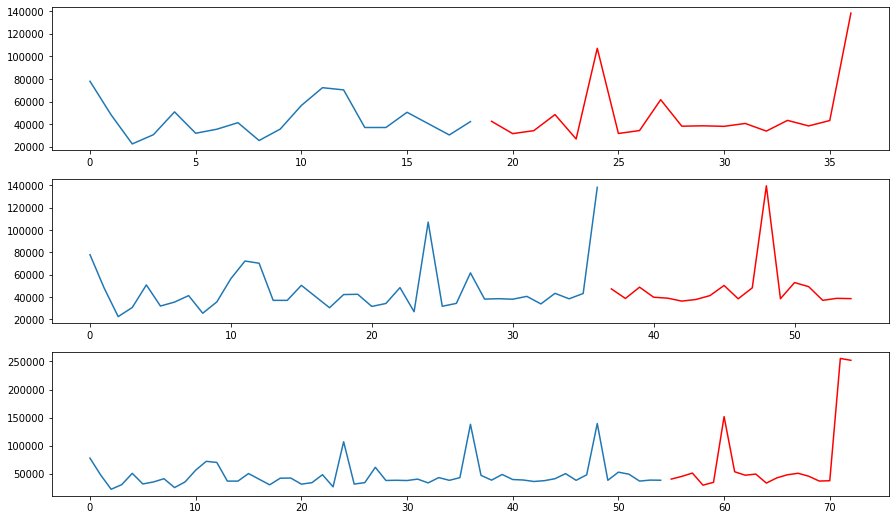

In [133]:
### 1

# calculate repeated train-test splits of time series data
X = s1.values
splits = TimeSeriesSplit(n_splits=3)
index = 1
plt.figure(1, figsize=(15,9))

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]

    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d\n-----' % (len(test)))

    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test], color='r')
    index += 1
plt.show() 

Observations: 37
Training Observations: 19
Testing Observations: 18
-----
Observations: 55
Training Observations: 37
Testing Observations: 18
-----
Observations: 73
Training Observations: 55
Testing Observations: 18
-----


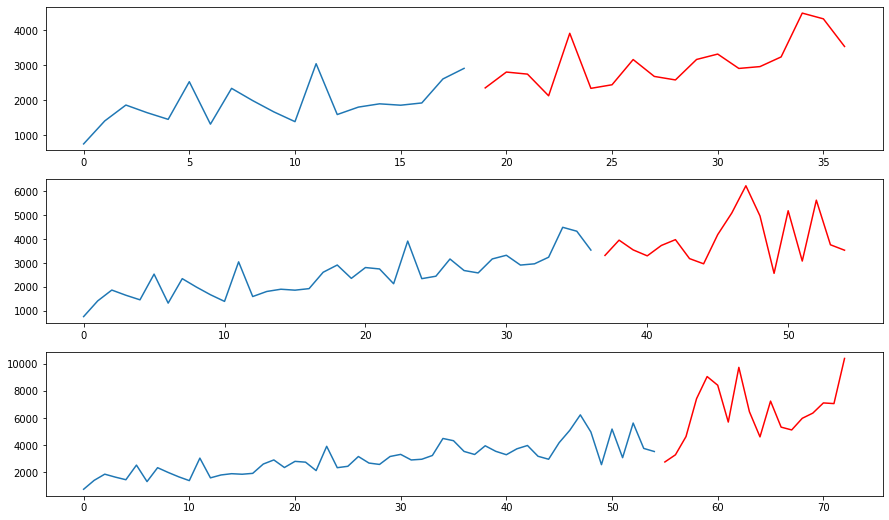

In [132]:
### 3

# calculate repeated train-test splits of time series data
X = s3.values
splits = TimeSeriesSplit(n_splits=3)
index = 1
plt.figure(1, figsize=(15,9))

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]

    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d\n-----' % (len(test)))

    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test], color='r')
    index += 1
plt.show() 

Observations: 37
Training Observations: 19
Testing Observations: 18
-----
Observations: 55
Training Observations: 37
Testing Observations: 18
-----
Observations: 73
Training Observations: 55
Testing Observations: 18
-----


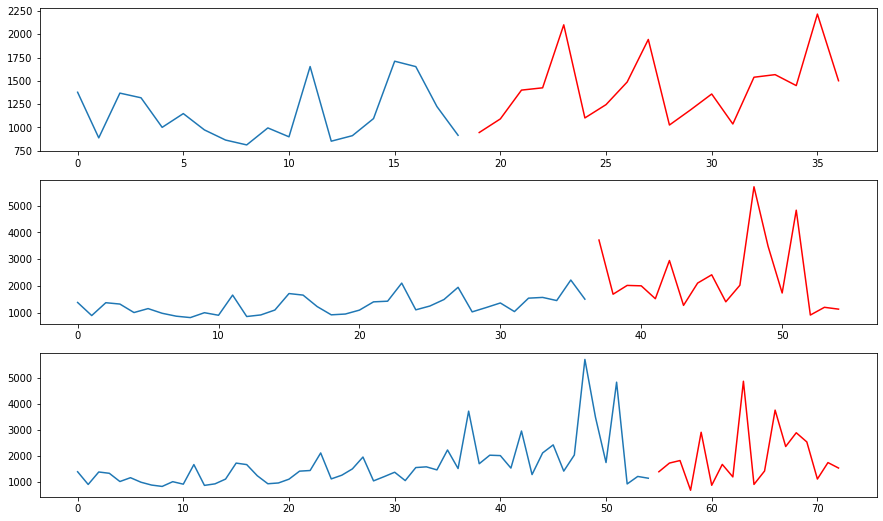

In [134]:
### 8

# calculate repeated train-test splits of time series data
X = s8.values
splits = TimeSeriesSplit(n_splits=3)
index = 1
plt.figure(1, figsize=(15,9))

for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]

    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d\n-----' % (len(test)))

    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test], color='r')
    index += 1
plt.show() 

### Walk Forward Validation
##### Esto determina si se usará una ventana deslizante o desplegable

In [145]:
s1.values

array([ 77921.5362    ,  48212.7211    ,  22552.4091    ,  30694.5941    ,
        50872.2152    ,  31980.3518    ,  35538.6311    ,  41317.9861    ,
        25554.743     ,  35652.9305    ,  56535.7354    ,  72257.1284    ,
        70300.0261    ,  37062.2169    ,  37070.0331    ,  50508.9107    ,
        40489.4351    ,  30464.5668    ,  42258.2818    ,  42504.9641    ,
        31637.5339    ,  34286.8115    ,  48465.1328    ,  26914.6418    ,
       107076.0235    ,  31786.965     ,  34359.5125    ,  61645.5854    ,
        38217.2339    ,  38557.4767    ,  38091.0684    ,  40639.6175    ,
        33888.8133    ,  43358.6423    ,  38466.435     ,  43214.5785    ,
       138189.3355    ,  47325.8297    ,  38768.1563    ,  48882.0076    ,
        39868.8787    ,  39024.8408    ,  36395.3666    ,  37849.4765    ,
        41339.5606    ,  50399.0426    ,  38475.4974    ,  48264.5917    ,
       139583.7861    ,  38537.7674    ,  52990.7089    ,  49341.8924    ,
        37095.5718    ,  

In [146]:
s1[-100:].values

array([ 77921.5362    ,  48212.7211    ,  22552.4091    ,  30694.5941    ,
        50872.2152    ,  31980.3518    ,  35538.6311    ,  41317.9861    ,
        25554.743     ,  35652.9305    ,  56535.7354    ,  72257.1284    ,
        70300.0261    ,  37062.2169    ,  37070.0331    ,  50508.9107    ,
        40489.4351    ,  30464.5668    ,  42258.2818    ,  42504.9641    ,
        31637.5339    ,  34286.8115    ,  48465.1328    ,  26914.6418    ,
       107076.0235    ,  31786.965     ,  34359.5125    ,  61645.5854    ,
        38217.2339    ,  38557.4767    ,  38091.0684    ,  40639.6175    ,
        33888.8133    ,  43358.6423    ,  38466.435     ,  43214.5785    ,
       138189.3355    ,  47325.8297    ,  38768.1563    ,  48882.0076    ,
        39868.8787    ,  39024.8408    ,  36395.3666    ,  37849.4765    ,
        41339.5606    ,  50399.0426    ,  38475.4974    ,  48264.5917    ,
       139583.7861    ,  38537.7674    ,  52990.7089    ,  49341.8924    ,
        37095.5718    ,  

In [147]:
# walk forward validation: the train set expanding each time step and the test set fixed at one time step ahead
X = s1[-100:].values
n_train = 63
n_records = len(X)

for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))
len(X)

train=63, test=1
train=64, test=1
train=65, test=1
train=66, test=1
train=67, test=1
train=68, test=1
train=69, test=1
train=70, test=1
train=71, test=1
train=72, test=1


73

In [150]:
# walk forward validation: the train set expanding each time step and the test set fixed at one time step ahead
X = s3[-100:].values
n_train = 63
n_records = len(X)

for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=63, test=1
train=64, test=1
train=65, test=1
train=66, test=1
train=67, test=1
train=68, test=1
train=69, test=1
train=70, test=1
train=71, test=1
train=72, test=1


In [151]:
# walk forward validation: the train set expanding each time step and the test set fixed at one time step ahead
X = s8[-100:].values
n_train = 63
n_records = len(X)

for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

train=63, test=1
train=64, test=1
train=65, test=1
train=66, test=1
train=67, test=1
train=68, test=1
train=69, test=1
train=70, test=1
train=71, test=1
train=72, test=1


### Persistence Model for Forecasting
##### Es una línea de base en el rendimiento le da una idea de qué tan bien se desempeñarán todos los otros modelos en su problema

##### 1-Transforme el conjunto de datos univariado en un problema de aprendizaje supervisado.
##### 2-Establezca el entrenamiento y los conjuntos de datos de prueba para el arnés de prueba.
##### 3-Definir el modelo de persistencia.
##### 4-Haga un pronóstico y establezca un rendimiento de referencia.

In [152]:
### 1

# Create lagged dataset
values = pd.DataFrame(s1.values)
df1 = pd.concat([values.shift(1), values], axis=1)
df1.columns = ['t', 't+1']

### 3

# Create lagged dataset
values = pd.DataFrame(s3.values)
df3 = pd.concat([values.shift(1), values], axis=1)
df3.columns = ['t', 't+1']

### 8

# Create lagged dataset
values = pd.DataFrame(s8.values)
df8 = pd.concat([values.shift(1), values], axis=1)
df8.columns = ['t', 't+1']

In [153]:
### 1

# split into train and test sets
X = df1.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

train_X1, train_y1 = train[:,0], train[:,1]
test_X1, test_y1 = test[:,0], test[:,1]

### 3

# split into train and test sets
X = df3.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

train_X3, train_y3 = train[:,0], train[:,1]
test_X3, test_y3 = test[:,0], test[:,1]

### 8

# split into train and test sets
X = df8.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

train_X8, train_y8 = train[:,0], train[:,1]
test_X8, test_y8 = test[:,0], test[:,1]

In [154]:
# persistence model
def model_persistence(x):
    return x

In [156]:
### 1

# walk-forward validation
predictions1 = []
for x in test_X1:
    yhat = model_persistence(x)
    predictions1.append(yhat)
rmse1 = np.sqrt(mean_squared_error(test_y1, predictions1))

### 3

# walk-forward validation
predictions3 = []
for x in test_X3:
    yhat = model_persistence(x)
    predictions3.append(yhat)
rmse3 = np.sqrt(mean_squared_error(test_y3, predictions3))

### 8

# walk-forward validation
predictions8 = []
for x in test_X8:
    yhat = model_persistence(x)
    predictions8.append(yhat)
rmse8 = np.sqrt(mean_squared_error(test_y8, predictions8))

print('Test RMSE: %.3f' % rmse1)
print('Test RMSE: %.3f' % rmse3)
print('Test RMSE: %.3f' % rmse8)

Test RMSE: 60243.896
Test RMSE: 2026.937
Test RMSE: 1981.125


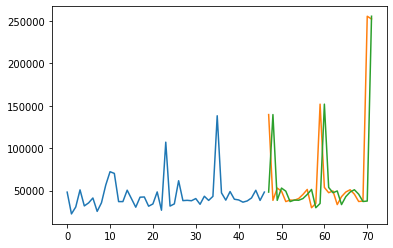

In [157]:
# plot predicciones y resultados esperados en los datos de prueba
plt.plot(train_y1[-50:])
plt.plot([None for i in train_y1[-50:]] + [x for x in test_y1])
plt.plot([None for i in train_y1[-50:]] + [x for x in predictions1])

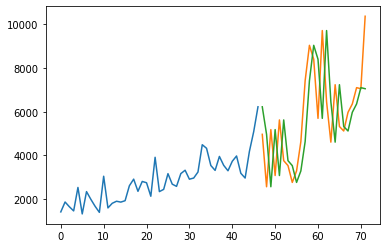

In [158]:
# plot predicciones y resultados esperados en los datos de prueba
plt.plot(train_y3[-50:])
plt.plot([None for i in train_y3[-50:]] + [x for x in test_y3])
plt.plot([None for i in train_y3[-50:]] + [x for x in predictions3])

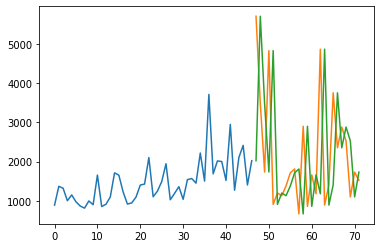

In [159]:
# plot predicciones y resultados esperados en los datos de prueba
plt.plot(train_y8[-50:])
plt.plot([None for i in train_y8[-50:]] + [x for x in test_y8])
plt.plot([None for i in train_y8[-50:]] + [x for x in predictions8])

### Visualize Residual Forecast Errors
##### Un error residual se calcula como el resultado esperado menos el pronóstico. 
##### Informar sobre su forecast model e incluso sugerir mejoras.

In [160]:
### 1
# calcular los residuos anteriores del persistence model
residuals1 = [test_y1[i]-predictions1[i] for i in range(len(test_y1))]
residuals1 = pd.DataFrame(residuals1)

### 3
# calcular los residuos anteriores del persistence model
residuals3 = [test_y3[i]-predictions3[i] for i in range(len(test_y3))]
residuals3 = pd.DataFrame(residuals3)

### 8
# calcular los residuos anteriores del persistence model
residuals8 = [test_y8[i]-predictions8[i] for i in range(len(test_y8))]
residuals8 = pd.DataFrame(residuals8)

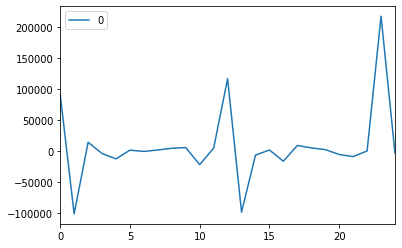

In [161]:
# plot residuals
residuals1.plot()

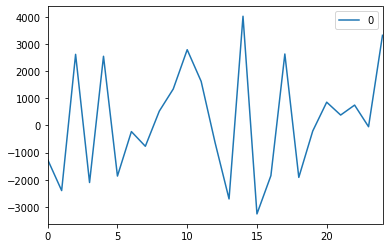

In [162]:
# plot residuals
residuals3.plot()

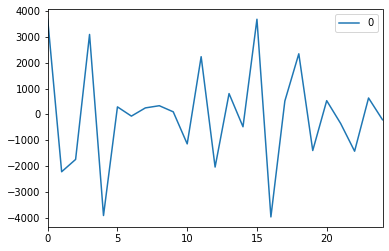

In [163]:
# plot residuals
residuals8.plot()

In [164]:
residuals1.describe()

0
count      25.000000
mean     8154.344412
std     60920.317425
min   -101046.018700
25%     -6200.233800
50%      1778.691500
75%      5433.901700
max    217726.837792

In [165]:
residuals3.describe()

0
count    25.000000
mean    165.866431
std    2061.796084
min   -3259.198800
25%   -1849.874900
50%     -48.269747
75%    1622.013800
max    4020.044700

In [166]:
residuals8.describe()

0
count    25.000000
mean    -20.030523
std    2021.873472
min   -3974.265700
25%   -1401.715900
50%      97.662800
75%     633.547797
max    3684.685300

##### Esperaríamos que los errores de pronóstico se distribuyan normalmente alrededor de una media de cero.

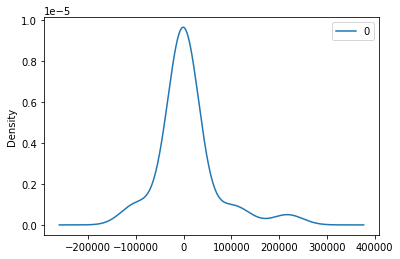

In [167]:
# density plot
residuals1.plot(kind='kde')

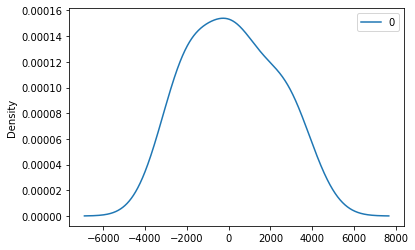

In [168]:
# density plot
residuals3.plot(kind='kde')

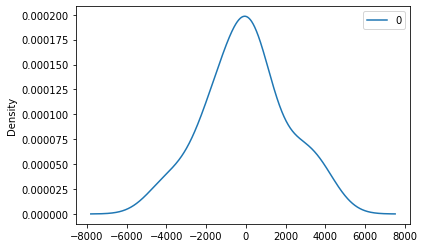

In [169]:
# density plot
residuals8.plot(kind='kde')

#### Residual Q-Q Plot
##### Verificar la normalidad de la distribución de errores residuales

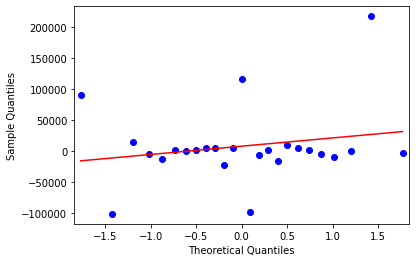

In [170]:
sm.qqplot(residuals1, line='r')
plt.show()

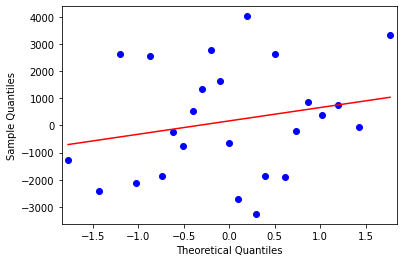

In [171]:
sm.qqplot(residuals3, line='r')
plt.show()

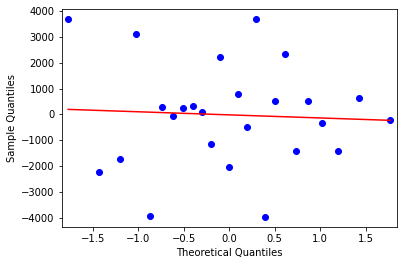

In [172]:
sm.qqplot(residuals8, line='r')
plt.show()

#### Residual Autocorrelation Plot

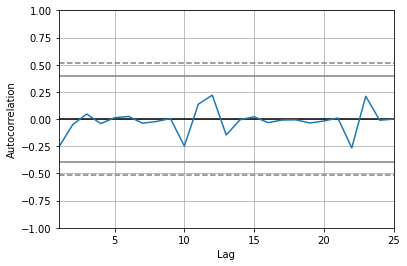

In [173]:
autocorrelation_plot(residuals1)

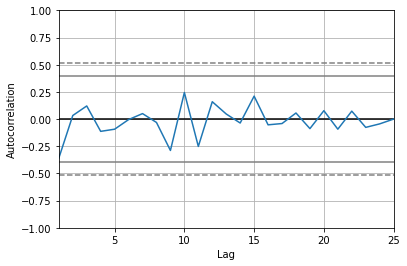

In [174]:
autocorrelation_plot(residuals3)

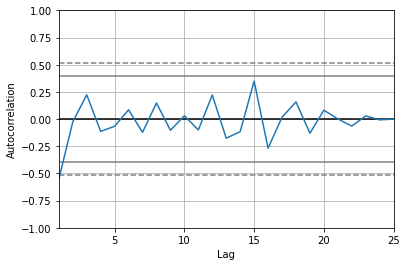

In [175]:
autocorrelation_plot(residuals8)

### Replantear Time Series Forecasting Problems
#### Enmarcados de clasificación
##### La clasificación implica predecir salidas categóricas o de etiquetas (como alta, media y baja). 

In [176]:
### 1

# Create lagged dataset
values = pd.DataFrame(s1.values)
df1 = pd.concat([values.shift(1), values], axis=1)
df1.columns = ['t', 't+1']

### 3

# Create lagged dataset
values = pd.DataFrame(s3.values)
df3 = pd.concat([values.shift(1), values], axis=1)
df3.columns = ['t', 't+1']

### 8

# Create lagged dataset
values = pd.DataFrame(s8.values)
df8 = pd.concat([values.shift(1), values], axis=1)
df8.columns = ['t', 't+1']

In [177]:
def make_discrete(row):
   if row['t+1'] < 0:
      return 'low'
   elif row['t+1'] > 3:
      return 'high'
   else:
      return 'medium'

In [178]:
### 1


# apply the above function to reassign t+1 values
df1['t+1'] = df1.apply(lambda row: make_discrete(row), axis=1)

### 3


# apply the above function to reassign t+1 values
df3['t+1'] = df3.apply(lambda row: make_discrete(row), axis=1)

### 8


# apply the above function to reassign t+1 values
df8['t+1'] = df8.apply(lambda row: make_discrete(row), axis=1)

In [179]:
# Randomly sample 10 elements from the dataframe
df1.sample(n=10)

t   t+1
22  34286.8115  high
43  36395.3666  high
0          NaN  high
19  42258.2818  high
39  38768.1563  high
44  37849.4765  high
52  49341.8924  high
68  51017.6987  high
57  45467.3639  high
60  34885.3901  high

In [180]:
# Randomly sample 10 elements from the dataframe
df3.sample(n=10)

t   t+1
28  2682.7419  high
42  3730.2535  high
48  6225.7428  high
12  3045.2614  high
67  5323.1519  high
35  4489.6105  high
70  6354.3125  high
23  2129.9310  high
45  2963.5042  high
71  7102.4903  high

In [182]:
# Randomly sample 10 elements from the dataframe
df8.sample(n=10)

t   t+1
24  2101.6206  high
6   1148.7118  high
32  1037.0027  high
35  1449.3401  high
0         NaN  high
54  1196.8230  high
27  1487.7057  high
28  1944.4526  high
40  2015.1593  high
50  3479.5276  high

### Time Horizon Framings
##### Pronosticar el valor mínimo para los próximos 3 meses.
##### Pronosticar el valor máximo relativo al promedio de los últimos 12 meses.
##### Pronosticar el mes del próximo año que tendrá el valor más bajo.

In [183]:
### 1

# create lagged dataset
values = pd.DataFrame(s1.values)
df1 = pd.concat([values.shift(1), values, values.shift(-1), values.shift(-2)], axis=1)
df1.columns = ['t', 't+1', 't+2', 't+3']

### 3

# create lagged dataset
values = pd.DataFrame(s3.values)
df3 = pd.concat([values.shift(1), values, values.shift(-1), values.shift(-2)], axis=1)
df3.columns = ['t', 't+1', 't+2', 't+3']

### 8

# create lagged dataset
values = pd.DataFrame(s8.values)
df8 = pd.concat([values.shift(1), values, values.shift(-1), values.shift(-2)], axis=1)
df8.columns = ['t', 't+1', 't+2', 't+3']

In [184]:
df1.head()

t         t+1         t+2         t+3
0         NaN  77921.5362  48212.7211  22552.4091
1  77921.5362  48212.7211  22552.4091  30694.5941
2  48212.7211  22552.4091  30694.5941  50872.2152
3  22552.4091  30694.5941  50872.2152  31980.3518
4  30694.5941  50872.2152  31980.3518  35538.6311

In [185]:
df3.head()

t        t+1        t+2        t+3
0        NaN   756.8933  1412.8500  1866.0071
1   756.8933  1412.8500  1866.0071  1648.8605
2  1412.8500  1866.0071  1648.8605  1457.7219
3  1866.0071  1648.8605  1457.7219  2532.1918
4  1648.8605  1457.7219  2532.1918  1320.4852

In [186]:
df8.head()

t        t+1        t+2        t+3
0        NaN  1377.8268   888.1894  1368.5135
1  1377.8268   888.1894  1368.5135  1318.3857
2   888.1894  1368.5135  1318.3857  1001.0690
3  1368.5135  1318.3857  1001.0690  1148.7118
4  1318.3857  1001.0690  1148.7118   973.5030

#### Pronosticar el valor mínimo para los próximos 3 días

### Forecasting

##### Elegimos Persistence Model como forecast performance baseline  y obtuvimos el error cuadrático medio de 
##### 1-Test RMSE: 60243.896
##### 3-Test RMSE: 2026.937
##### 8-Test RMSE: 1981.125

### Autoregression Model
##### Ecuación de regresión para predecir el valor en el siguiente paso de tiempo.
##### Pronósticos precisos sobre una serie de problemas de series de tiempo.

In [187]:
### 1

# split dataset
X = s1.values
train_size = int(len(X) * 0.66)
train1, test1 = X[1:train_size], X[train_size:]

### 3

# split dataset
X = s3.values
train_size = int(len(X) * 0.66)
train3, test3 = X[1:train_size], X[train_size:]

### 8

# split dataset
X = s8.values
train_size = int(len(X) * 0.66)
train8, test8 = X[1:train_size], X[train_size:]

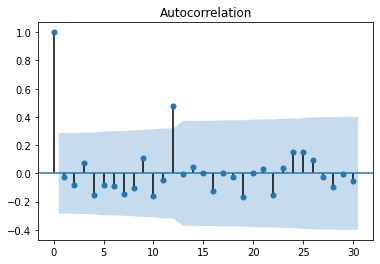

In [188]:
plot_acf(train1, lags=30)
plt.show()

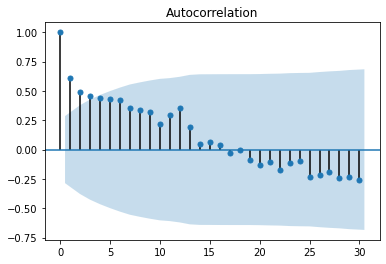

In [189]:
plot_acf(train3, lags=30)
plt.show()

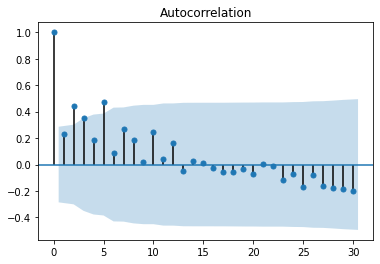

In [190]:
plot_acf(train8, lags=30)
plt.show()

##### Se utilizan para predecir el valor en el siguiente paso del tiempo. 
##### Esta relación entre variables se llama correlación. 
##### Si ambas variables cambian en la misma dirección, esto se llama correlación positiva. 
##### Si las variables se mueven en direcciones opuestas a medida que cambian los valores (por ejemplo, una sube y la otra baja), esto se llama correlación negativa.

### Un modelo de autorregresión 
##### Modelo de regresión lineal que utiliza variables rezagadas como variables de entrada. 
##### La biblioteca Statsmodels proporciona un modelo de autorregresión que selecciona automáticamente un valor de retraso apropiado mediante pruebas estadísticas y entrena un modelo de regresión lineal. 
##### Se proporciona en la clase AR.

In [193]:
### 1

# train autoregression
model = AR(train1)
model_fit1 = model.fit()

### 3

# train autoregression
model = AR(train3)
model_fit3 = model.fit()

### 8

# train autoregression
model = AR(train8)
model_fit8 = model.fit()

print('1')
print('Lag: %s' % model_fit1.k_ar)
print('Coefficients: %s' % model_fit1.params)
print('************************************')
print('3')
print('Lag: %s' % model_fit3.k_ar)
print('Coefficients: %s' % model_fit3.params)
print('************************************')
print('8')
print('Lag: %s' % model_fit8.k_ar)
print('Coefficients: %s' % model_fit8.params)

1
Lag: 10
Coefficients: [ 1.57521264e+05 -2.07938658e-01 -3.15482192e-01 -1.38279556e-01
 -3.19927645e-01 -2.01997395e-01 -3.26649675e-01 -2.54075279e-01
 -2.98617878e-01 -4.50732641e-02 -3.09303370e-01]
************************************
3
Lag: 10
Coefficients: [ 1.90027004e+02  4.54031748e-01 -7.19130362e-02  1.34527872e-01
  9.51332338e-02  1.89407470e-02  2.71181599e-01 -5.09106455e-02
  1.06816958e-01  1.03785719e-01 -3.00183890e-02]
************************************
8
Lag: 10
Coefficients: [ 5.68510110e+02  1.23519229e-01  2.37037624e-01 -6.27946429e-02
  8.63522285e-02  3.48996186e-01 -2.52301574e-01  1.23700196e-01
  1.68707403e-01 -2.89661743e-01  1.95967803e-01]


#### Use el modelo para hacer predicciones para una semana

In [194]:
### 1

# make predictions
predictions1 = model_fit1.predict(start=len(train1), end=len(train1)+len(test1)-1, dynamic=False)

### 3

# make predictions
predictions3 = model_fit3.predict(start=len(train3), end=len(train3)+len(test3)-1, dynamic=False)

### 8

# make predictions
predictions8 = model_fit8.predict(start=len(train8), end=len(train8)+len(test8)-1, dynamic=False)

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

In [197]:
### 1

test_period = 7
for i in range(test_period):
    print('predicted=%f, expected=%f' % (predictions1[i], test1[i]))

rmse1 = np.sqrt(mean_squared_error(test1[:test_period], predictions1[:test_period]))
print('Test RMSE: %.3f' % rmse1)
print('************************************')

### 3

test_period = 7
for i in range(test_period):
    print('predicted=%f, expected=%f' % (predictions3[i], test3[i]))

rmse3 = np.sqrt(mean_squared_error(test3[:test_period], predictions3[:test_period]))
print('Test RMSE: %.3f' % rmse3)
print('************************************')

### 8

test_period = 7
for i in range(test_period):
    print('predicted=%f, expected=%f' % (predictions8[i], test8[i]))

rmse8 = np.sqrt(mean_squared_error(test8[:test_period], predictions8[:test_period]))
print('Test RMSE: %.3f' % rmse8)

predicted=59602.799129, expected=139583.786100
predicted=49925.425988, expected=38537.767400
predicted=51093.326275, expected=52990.708900
predicted=47711.733039, expected=49341.892400
predicted=45078.444567, expected=37095.571800
predicted=43856.593322, expected=38874.263300
predicted=42872.144771, expected=38637.609000
Test RMSE: 30797.439
************************************
predicted=5044.773615, expected=4964.846000
predicted=4465.784284, expected=2564.752300
predicted=4610.018882, expected=5181.582600
predicted=4953.164762, expected=3078.676000
predicted=5000.159505, expected=5624.098000
predicted=5332.923708, expected=3758.938900
predicted=5381.116526, expected=3531.868900
Test RMSE: 1401.384
************************************
predicted=1152.282793, expected=5703.372600
predicted=2160.134800, expected=3479.527600
predicted=2020.144615, expected=1732.405300
predicted=1231.500303, expected=4827.839400
predicted=2377.922671, expected=907.588600
predicted=1325.990591, expected=119

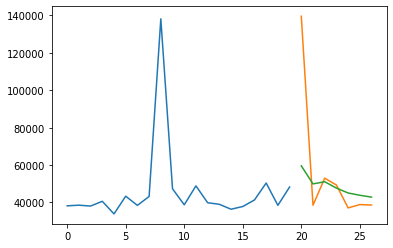

In [199]:
### 1

# plot predictions and expected results on the test data
plt.plot(train_y1[-20:])
plt.plot([None for i in train_y1[-20:]] + [x for x in test_y1[:test_period]])
plt.plot([None for i in train_y1[-20:]] + [x for x in predictions1[:test_period]])

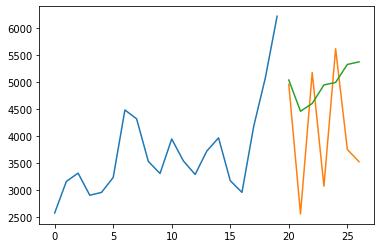

In [200]:
### 3

# plot predictions and expected results on the test data
plt.plot(train_y3[-20:])
plt.plot([None for i in train_y3[-20:]] + [x for x in test_y3[:test_period]])
plt.plot([None for i in train_y3[-20:]] + [x for x in predictions3[:test_period]])

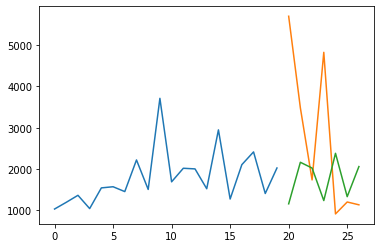

In [201]:
### 8

# plot predictions and expected results on the test data
plt.plot(train_y8[-20:])
plt.plot([None for i in train_y8[-20:]] + [x for x in test_y8[:test_period]])
plt.plot([None for i in train_y8[-20:]] + [x for x in predictions8[:test_period]])

### Walk Forward Validation
##### Utilizar los coeficientes aprendidos y hacer predicciones manualmente

In [202]:
### 1

# split dataset
X = s1.values
train_size = int(len(X) * 0.66)
train1, test1 = X[1:train_size], X[train_size:]

### 3

# split dataset
X = s3.values
train_size = int(len(X) * 0.66)
train3, test3 = X[1:train_size], X[train_size:]

### 8

# split dataset
X = s8.values
train_size = int(len(X) * 0.66)
train8, test8 = X[1:train_size], X[train_size:]

In [204]:
### 1

# train autoregression
model = AR(train1)
model_fit = model.fit()
window1 = model_fit.k_ar
coef1 = model_fit.params

### 3

# train autoregression
model = AR(train3)
model_fit = model.fit()
window3 = model_fit.k_ar
coef3 = model_fit.params

### 8

# train autoregression
model = AR(train8)
model_fit = model.fit()
window8 = model_fit.k_ar
coef8 = model_fit.params

Test RMSE: 84453.138


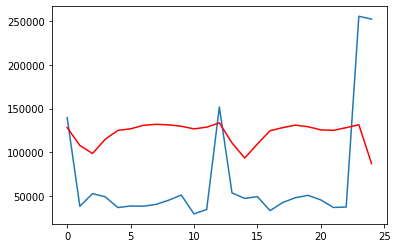

In [205]:
### 1

# walk forward over time steps in test
history = train1[len(train1)-window:]
history = [history[i] for i in range(len(history))]
predictions1 = []
for t in range(len(test1)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef1[0]
    for d in range(window):
        yhat += coef1[d+1] * lag[window-d-1]
    obs = test1[t]
    predictions1.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse1 = np.sqrt(mean_squared_error(test1, predictions1))
print('Test RMSE: %.3f' % rmse1)
# plot
plt.plot(test1)
plt.plot(predictions1, color='red')

Test RMSE: 3286.919


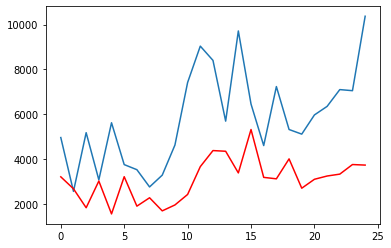

In [208]:
### 3

# walk forward over time steps in test
history = train3[len(train3)-window:]
history = [history[i] for i in range(len(history))]
predictions3 = []
for t in range(len(test3)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef3[0]
    for d in range(window):
        yhat += coef3[d+1] * lag[window-d-1]
    obs = test3[t]
    predictions3.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse3 = np.sqrt(mean_squared_error(test3, predictions3))
print('Test RMSE: %.3f' % rmse3)
# plot
plt.plot(test3)
plt.plot(predictions3, color='red')

Test RMSE: 1724.577


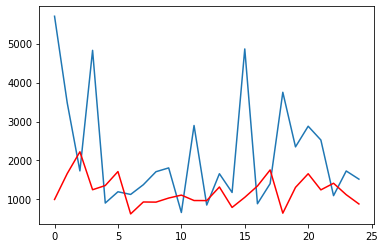

In [211]:
### 8

# walk forward over time steps in test
history = train8[len(train8)-window:]
history = [history[i] for i in range(len(history))]
predictions8 = []
for t in range(len(test8)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef8[0]
    for d in range(window):
        yhat += coef8[d+1] * lag[window-d-1]
    obs = test8[t]
    predictions8.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse8 = np.sqrt(mean_squared_error(test8, predictions8))
print('Test RMSE: %.3f' % rmse8)
# plot
plt.plot(test8)
plt.plot(predictions8, color='red')

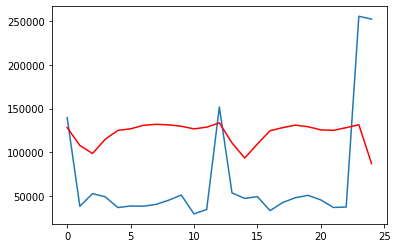

In [212]:
# zoom plot
plt.plot(test1[-100:])
plt.plot(predictions1[-100:], color='red')
plt.show()

### Persistence Forecast Model

In [213]:
### 1

# create lagged dataset
values = pd.DataFrame(s1.values)
df1 = pd.concat([values.shift(1), values], axis=1)
df1.columns = ['t', 't+1']

### 3

# create lagged dataset
values = pd.DataFrame(s3.values)
df3 = pd.concat([values.shift(1), values], axis=1)
df3.columns = ['t', 't+1']

### 8

# create lagged dataset
values = pd.DataFrame(s8.values)
df8 = pd.concat([values.shift(1), values], axis=1)
df8.columns = ['t', 't+1']

In [214]:
### 1

# split into train and test sets
X = df1.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X1, train_y1 = train[:,0], train[:,1]
test_X1, test_y1 = test[:,0], test[:,1]

### 3

# split into train and test sets
X = df3.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X3, train_y3 = train[:,0], train[:,1]
test_X3, test_y3 = test[:,0], test[:,1]

### 8

# split into train and test sets
X = df8.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X8, train_y8 = train[:,0], train[:,1]
test_X8, test_y8 = test[:,0], test[:,1]

In [215]:
### 1

# persistence model
predictions1 = [x for x in test_X1]

### 3

# persistence model
predictions3 = [x for x in test_X3]

### 8

# persistence model
predictions8 = [x for x in test_X8]

Test RMSE: 60243.896


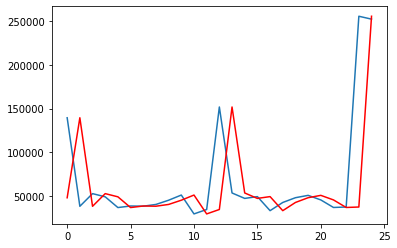

In [216]:
### 1

# skill of persistence model
rmse1 = np.sqrt(mean_squared_error(test_y1, predictions1))
print('Test RMSE: %.3f' % rmse1)
# plot
plt.plot(test_y1)
plt.plot(predictions1, color='red')

Test RMSE: 2026.937


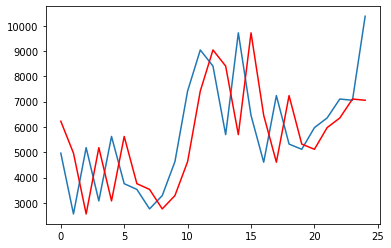

In [217]:
### 3

# skill of persistence model
rmse3 = np.sqrt(mean_squared_error(test_y3, predictions3))
print('Test RMSE: %.3f' % rmse3)
# plot
plt.plot(test_y3)
plt.plot(predictions3, color='red')

Test RMSE: 1981.125


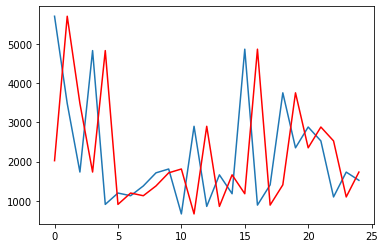

In [218]:
### 8

# skill of persistence model
rmse8 = np.sqrt(mean_squared_error(test_y8, predictions8))
print('Test RMSE: %.3f' % rmse8)
# plot
plt.plot(test_y8)
plt.plot(predictions8, color='red')

### Moving Average Models for Forecasting
#### Autorregresión de error residual

In [219]:
### 1

# create lagged dataset
values = pd.DataFrame(s1.values)
df1 = pd.concat([values.shift(1), values], axis=1)
df1.columns = ['t', 't+1']

### 3

# create lagged dataset
values = pd.DataFrame(s3.values)
df3 = pd.concat([values.shift(1), values], axis=1)
df3.columns = ['t', 't+1']

### 8

# create lagged dataset
values = pd.DataFrame(s8.values)
df8 = pd.concat([values.shift(1), values], axis=1)
df8.columns = ['t', 't+1']

In [220]:
### 1

# split into train and test sets
X = df1.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X1, train_y1 = train[:,0], train[:,1]
test_X1, test_y1 = test[:,0], test[:,1]

### 3

# split into train and test sets
X = df3.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X3, train_y3 = train[:,0], train[:,1]
test_X3, test_y3 = test[:,0], test[:,1]

### 8

# split into train and test sets
X = df8.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X8, train_y8 = train[:,0], train[:,1]
test_X8, test_y8 = test[:,0], test[:,1]

In [221]:
### 1

# persistence model on training set
train_pred1 = [x for x in train_X1]

### 3

# persistence model on training set
train_pred3 = [x for x in train_X3]

### 8

# persistence model on training set
train_pred8 = [x for x in train_X8]

In [222]:
### 1

# calculate residuals
train_resid1 = [train_y1[i]-train_pred1[i] for i in range(len(train_pred1))]

### 3

# calculate residuals
train_resid3 = [train_y3[i]-train_pred3[i] for i in range(len(train_pred3))]

### 8

# calculate residuals
train_resid8 = [train_y8[i]-train_pred8[i] for i in range(len(train_pred8))]

In [224]:
### 1

# model the training set residuals
model = AR(train_resid1)
model_fit = model.fit()
window1 = model_fit.k_ar
coef1 = model_fit.params

### 3


# model the training set residuals
model = AR(train_resid3)
model_fit = model.fit()
window3 = model_fit.k_ar
coef3 = model_fit.params

### 8


# model the training set residuals
model = AR(train_resid8)
model_fit = model.fit()
window8 = model_fit.k_ar
coef8 = model_fit.params

print('Lag=%d, Coef=%s' % (window1, coef1))
print('Lag=%d, Coef=%s' % (window3, coef3))
print('Lag=%d, Coef=%s' % (window8, coef8))

Lag=10, Coef=[ 5.27938587e+02 -8.33255885e-01 -7.96908987e-01 -5.72328562e-01
 -5.98167387e-01 -4.87585080e-01 -5.25309040e-01 -4.51533749e-01
 -4.23868674e-01 -1.36823238e-01 -1.85648022e-01]
Lag=10, Coef=[ 3.50601005e+02 -5.45449348e-01 -6.27932599e-01 -5.15320114e-01
 -4.06908314e-01 -4.92873506e-01 -2.13859447e-01 -3.36516110e-01
 -3.32001613e-01 -2.64326418e-01 -3.29463951e-01]
Lag=10, Coef=[162.13879596  -0.95395643  -0.66291149  -0.68760072  -0.62579152
  -0.25725633  -0.49152874  -0.41456743  -0.20220213  -0.51593825
  -0.36408284]


predicted error=-3311.901820, expected error=91319.194400
predicted error=-76541.149275, expected error=-101046.018700
predicted error=6349.463327, expected error=14452.941500
predicted error=16744.837248, expected error=-3648.816500
predicted error=49882.179983, expected error=-12246.320600
predicted error=5368.200732, expected error=1778.691500
predicted error=10893.358270, expected error=-236.654300
predicted error=6316.595988, expected error=2016.382600
predicted error=-1981.628089, expected error=4813.372300
predicted error=-4954.261607, expected error=5899.675500
predicted error=-9377.853738, expected error=-21532.031600
predicted error=11013.295755, expected error=5050.382300
predicted error=10102.194513, expected error=116982.822400
predicted error=-88649.984947, expected error=-98133.313000
predicted error=-13817.041406, expected error=-6200.233800
predicted error=16945.028454, expected error=2055.602300
predicted error=59920.615792, expected error=-16046.628400
predicted erro

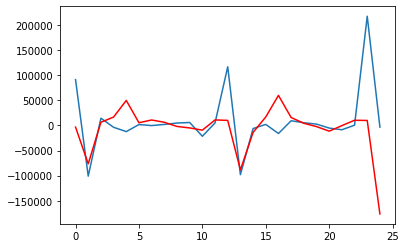

In [225]:
### 1

# walk forward over time steps in test
history = train_resid1[len(train_resid1)-window:]
history = [history[i] for i in range(len(history))]
predictions, expected_error = [], []

for t in range(len(test_y1)):
    # persistence
    yhat = test_X1[t]
    error = test_y1[t] - yhat
    expected_error.append(error)

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef1[0]

    for d in range(window):
        pred_error += coef1[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

 
# plot predicted error
plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.show()

predicted error=-1466.577254, expected error=-1260.896800
predicted error=-141.914233, expected error=-2400.093700
predicted error=1865.192260, expected error=2616.830300
predicted error=1080.115183, expected error=-2102.906600
predicted error=1091.253545, expected error=2545.422000
predicted error=-1065.819445, expected error=-1865.159100
predicted error=853.267435, expected error=-227.070000
predicted error=333.943236, expected error=-768.716300
predicted error=1873.635464, expected error=525.935000
predicted error=663.445865, expected error=1341.059000
predicted error=-314.995512, expected error=2788.236100
predicted error=-2283.360104, expected error=1622.013800
predicted error=-2976.024382, expected error=-636.520200
predicted error=-1757.558952, expected error=-2707.378300
predicted error=1391.174180, expected error=4020.044700
predicted error=185.933001, expected error=-3259.198800
predicted error=999.178241, expected error=-1849.874900
predicted error=1334.561344, expected erro

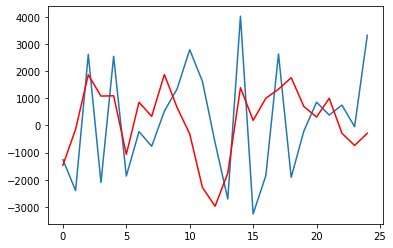

In [226]:
### 3

# walk forward over time steps in test
history = train_resid3[len(train_resid3)-window:]
history = [history[i] for i in range(len(history))]
predictions, expected_error = [], []

for t in range(len(test_y3)):
    # persistence
    yhat = test_X3[t]
    error = test_y3[t] - yhat
    expected_error.append(error)

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef3[0]

    for d in range(window):
        pred_error += coef3[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

 
# plot predicted error
plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.show()

predicted error=27.849981, expected error=3681.613300
predicted error=-3066.231980, expected error=-2223.845000
predicted error=-582.688374, expected error=-1747.122300
predicted error=771.549787, expected error=3095.434100
predicted error=-103.465584, expected error=-3920.250800
predicted error=3051.210968, expected error=289.234400
predicted error=356.578363, expected error=-68.435500
predicted error=2731.253757, expected error=249.228700
predicted error=-229.125628, expected error=334.271600
predicted error=-274.902016, expected error=97.662800
predicted error=-323.989579, expected error=-1144.815200
predicted error=959.655430, expected error=2233.666300
predicted error=-1276.923390, expected error=-2042.200000
predicted error=1416.761314, expected error=804.211800
predicted error=-787.116934, expected error=-481.282300
predicted error=1492.358092, expected error=3684.685300
predicted error=-3586.819482, expected error=-3974.265700
predicted error=1841.724938, expected error=515.940

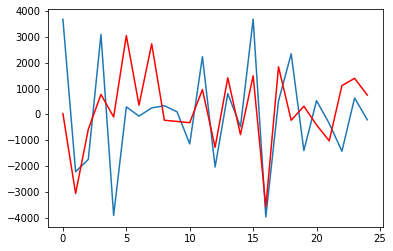

In [227]:
### 8

# walk forward over time steps in test
history = train_resid8[len(train_resid8)-window:]
history = [history[i] for i in range(len(history))]
predictions, expected_error = [], []

for t in range(len(test_y8)):
    # persistence
    yhat = test_X8[t]
    error = test_y8[t] - yhat
    expected_error.append(error)

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef8[0]

    for d in range(window):
        pred_error += coef8[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

 
# plot predicted error
plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.show()

### Correct Predictions with a Model of Residuals
##### Teniendo una buena estimación del error de pronóstico en un paso de tiempo, podemos hacer mejores predicciones
##### Agregar el error de pronóstico esperado a una predicción para corregirlo

In [228]:
### 1

# create lagged dataset
values = pd.DataFrame(s1.values)
df1 = pd.concat([values.shift(1), values], axis=1)
df1.columns = ['t', 't+1']

### 3

# create lagged dataset
values = pd.DataFrame(s3.values)
df3 = pd.concat([values.shift(1), values], axis=1)
df3.columns = ['t', 't+1']

### 8

# create lagged dataset
values = pd.DataFrame(s8.values)
df8 = pd.concat([values.shift(1), values], axis=1)
df8.columns = ['t', 't+1']

In [232]:
### 1

# split into train and test sets
X = df1.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X1, train_y1 = train[:,0], train[:,1]
test_X1, test_y1 = test[:,0], test[:,1]

### 3

# split into train and test sets
X = df3.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X3, train_y3 = train[:,0], train[:,1]
test_X3, test_y3 = test[:,0], test[:,1]

### 8

# split into train and test sets
X = df8.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X8, train_y8 = train[:,0], train[:,1]
test_X8, test_y8 = test[:,0], test[:,1]

In [233]:
### 1

# persistence model on training set
train_pred1 = [x for x in train_X1]

### 3

# persistence model on training set
train_pred3 = [x for x in train_X3]

### 8

# persistence model on training set
train_pred8 = [x for x in train_X8]

In [235]:
### 1

# calculate residuals
train_resid1 = [train_y1[i]-train_pred1[i] for i in range(len(train_pred1))]

### 3

# calculate residuals
train_resid3 = [train_y3[i]-train_pred3[i] for i in range(len(train_pred3))]

### 8

# calculate residuals
train_resid8 = [train_y8[i]-train_pred8[i] for i in range(len(train_pred8))]

In [236]:
### 1

# model the training set residuals
model = AR(train_resid1)
model_fit = model.fit()
window1 = model_fit.k_ar
coef1 = model_fit.params

### 3


# model the training set residuals
model = AR(train_resid3)
model_fit = model.fit()
window3 = model_fit.k_ar
coef3 = model_fit.params

### 8


# model the training set residuals
model = AR(train_resid8)
model_fit = model.fit()
window8 = model_fit.k_ar
coef8 = model_fit.params

print('Lag=%d, Coef=%s' % (window1, coef1))
print('Lag=%d, Coef=%s' % (window3, coef3))
print('Lag=%d, Coef=%s' % (window8, coef8))

Lag=10, Coef=[ 5.27938587e+02 -8.33255885e-01 -7.96908987e-01 -5.72328562e-01
 -5.98167387e-01 -4.87585080e-01 -5.25309040e-01 -4.51533749e-01
 -4.23868674e-01 -1.36823238e-01 -1.85648022e-01]
Lag=10, Coef=[ 3.50601005e+02 -5.45449348e-01 -6.27932599e-01 -5.15320114e-01
 -4.06908314e-01 -4.92873506e-01 -2.13859447e-01 -3.36516110e-01
 -3.32001613e-01 -2.64326418e-01 -3.29463951e-01]
Lag=10, Coef=[162.13879596  -0.95395643  -0.66291149  -0.68760072  -0.62579152
  -0.25725633  -0.49152874  -0.41456743  -0.20220213  -0.51593825
  -0.36408284]


Test RMSE: 64917.570


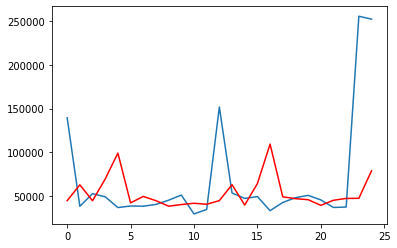

In [244]:
# walk forward over time steps in test
history = train_resid1[len(train_resid1)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_y1)):
    # persistence
    yhat = test_X1[t]
    error = test_y1[t] - yhat

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef1[0]
    for d in range(window):
        pred_error += coef1[d+1] * lag[window-d-1]

    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    #print('predicted=%f, expected=%f' % (yhat, test_y[t]))

# error
rmse1 = np.sqrt(mean_squared_error(test_y1, predictions))
print('Test RMSE: %.3f' % rmse1)

# plot predicted error
plt.plot(test_y1)
plt.plot(predictions, color='red')

Test RMSE: 2122.457


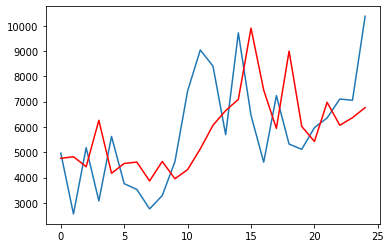

In [245]:
# walk forward over time steps in test
history = train_resid3[len(train_resid3)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_y3)):
    # persistence
    yhat = test_X3[t]
    error = test_y3[t] - yhat

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef3[0]
    for d in range(window):
        pred_error += coef3[d+1] * lag[window-d-1]

    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    #print('predicted=%f, expected=%f' % (yhat, test_y[t]))

# error
rmse3 = np.sqrt(mean_squared_error(test_y3, predictions))
print('Test RMSE: %.3f' % rmse3)

# plot predicted error
plt.plot(test_y3)
plt.plot(predictions, color='red')

Test RMSE: 1774.757


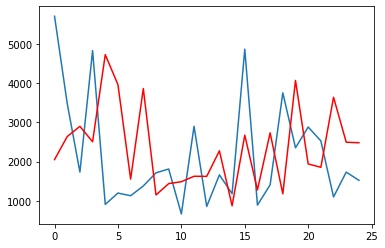

In [246]:
# walk forward over time steps in test
history = train_resid8[len(train_resid8)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test_y8)):
    # persistence
    yhat = test_X8[t]
    error = test_y8[t] - yhat

    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef8[0]
    for d in range(window):
        pred_error += coef8[d+1] * lag[window-d-1]

    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    #print('predicted=%f, expected=%f' % (yhat, test_y[t]))

# error
rmse8 = np.sqrt(mean_squared_error(test_y8, predictions))
print('Test RMSE: %.3f' % rmse8)
# plot predicted error
plt.plot(test_y8)
plt.plot(predictions, color='red')

### ARIMA Model for Forecasting
#### Un modelo ARIMA es una clase de modelo estadístico para analizar y pronosticar datos de series temporales.
##### ARIMA (Autoregressive Integrated Moving Average Model)
##### Ajustaremos un modelo ARIMA a todo el conjunto de datos y  revisaremos los errores residuales

In [249]:
### 1
# fit model
model = ARIMA(s1, order=(5,1,0))
model_fit1 = model.fit(disp=0)

### 3
# fit model
model = ARIMA(s3, order=(5,1,0))
model_fit3 = model.fit(disp=0)

### 8
# fit model
model = ARIMA(s8, order=(5,1,0))
model_fit8 = model.fit(disp=0)

/Users/ariasrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/ariasrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/ariasrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/ariasrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/ariasrodriguez/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/ariasrod

In [250]:
# summary of fit model
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   72
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -862.803
Method:                       css-mle   S.D. of innovations          38607.473
Date:                Tue, 24 Mar 2020   AIC                           1739.606
Time:                        10:55:07   BIC                           1755.543
Sample:                    02-01-2014   HQIC                          1745.951
                         - 01-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1677.3251   2042.562      0.821      0.412   -2326.023    5680.673
ar.L1.D.y     -0.4239      0.127     -3.345      0.001      -0.672      -0.176
ar.L2.D.y     -0.4292      0.194     -2.212      0.0

In [251]:
# summary of fit model
print(model_fit3.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   72
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -611.428
Method:                       css-mle   S.D. of innovations           1176.045
Date:                Tue, 24 Mar 2020   AIC                           1236.856
Time:                        10:55:14   BIC                           1252.793
Sample:                    02-01-2014   HQIC                          1243.201
                         - 01-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.9794     66.355      1.537      0.124     -28.074     232.032
ar.L1.D.y     -0.4988      0.122     -4.072      0.000      -0.739      -0.259
ar.L2.D.y     -0.2292      0.135     -1.692      0.0

In [252]:
# summary of fit model
print(model_fit8.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   72
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -595.683
Method:                       css-mle   S.D. of innovations            941.872
Date:                Tue, 24 Mar 2020   AIC                           1205.366
Time:                        10:55:20   BIC                           1221.303
Sample:                    02-01-2014   HQIC                          1211.711
                         - 01-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4595     39.527      0.163      0.870     -71.011      83.930
ar.L1.D.y     -0.8606      0.117     -7.363      0.000      -1.090      -0.631
ar.L2.D.y     -0.5834      0.155     -3.765      0.0

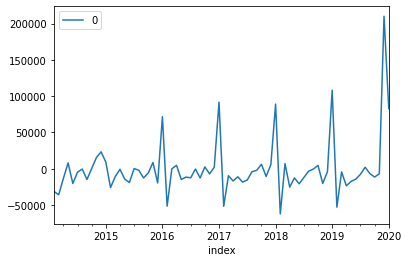

In [253]:
# line plot of residuals
residuals1 = pd.DataFrame(model_fit1.resid)
residuals1.plot()
plt.show()

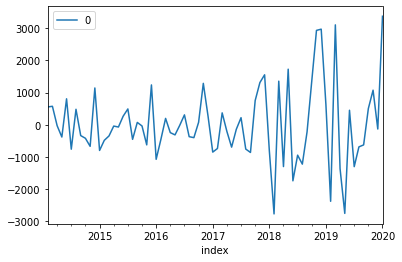

In [254]:
# line plot of residuals
residuals3 = pd.DataFrame(model_fit3.resid)
residuals3.plot()
plt.show()

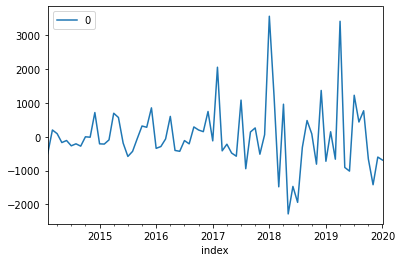

In [255]:
# line plot of residuals
residuals8 = pd.DataFrame(model_fit8.resid)
residuals8.plot()
plt.show()

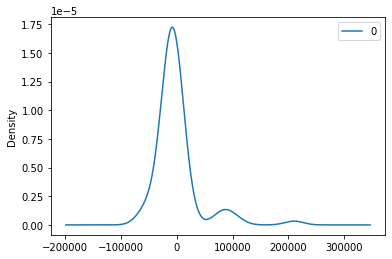

In [256]:
# density plot of residuals
residuals1.plot(kind='kde')

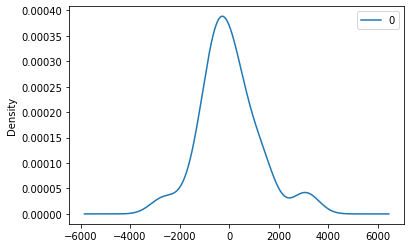

In [257]:
# density plot of residuals
residuals3.plot(kind='kde')

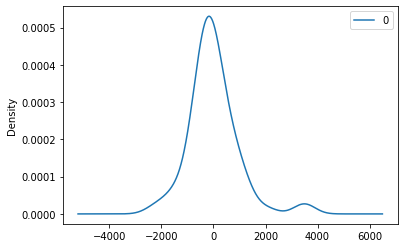

In [258]:
# density plot of residuals
residuals8.plot(kind='kde')

[(-100000.0, 100000.0)]

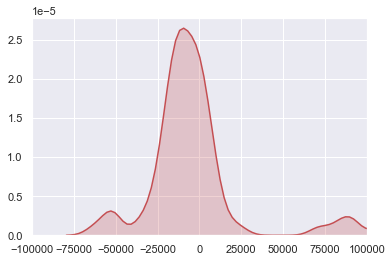

In [264]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals1.values), shade=True, color="r").set(xlim=(-100000, 100000))

[(-5000.0, 5000.0)]

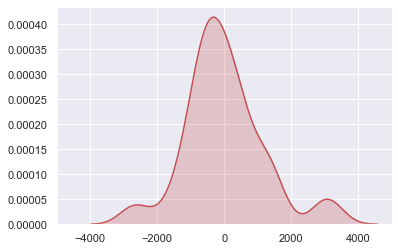

In [269]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals3.values), shade=True, color="r").set(xlim=(-5000, 5000))

[(-5000.0, 5000.0)]

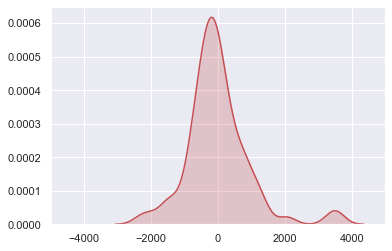

In [270]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals8.values), shade=True, color="r").set(xlim=(-5000, 5000))

In [265]:
# summary stats of residuals
residuals1.describe()

0
count      72.000000
mean     -577.747223
std     38946.013602
min    -62365.152638
25%    -15090.515622
50%     -7157.486688
75%      2013.504374
max    210188.409421

In [271]:
residuals3.describe()

0
count    72.000000
mean      8.775283
std    1185.011962
min   -2770.519272
25%    -689.266306
50%    -135.869672
75%     517.272745
max    3372.683186

In [272]:
residuals8.describe()

0
count    72.000000
mean     -4.098499
std     949.397247
min   -2281.477003
25%    -483.482328
50%    -115.276419
75%     299.602654
max    3568.486967

### Rolling Forecast ARIMA Model
##### Vamos a dividir el conjunto de datos conjuntos de entrenamiento y prueba
##### Luego, para usaremos el conjunto de entrenamiento para ajustar el modelo y generar una predicción para cada elemento en el conjunto de prueba.

In [375]:
### 1 
# split into train and test sets
X = s1.values
size = int(len(X) * 0.66)
train1, test1 = X[0:size], X[size:len(X)]
history1 = [x for x in train1]
predictions1 = []

### 3 
# split into train and test sets
X = s3.values
size = int(len(X) * 0.66)
train3, test3 = X[0:size], X[size:len(X)]
history3 = [x for x in train3]
predictions3 = []

### 8 
# split into train and test sets
X = s8.values
size = int(len(X) * 0.66)
train8, test8 = X[0:size], X[size:len(X)]
history8 = [x for x in train8]
predictions8 = []

##### pronóstico continuo dada la dependencia de las observaciones en los pasos de tiempo anteriores para la diferenciación y el modelo AR
##### Realizar seguimiento manual de todas las observaciones en la lista llamada historial que se siembra con los datos de entrenamiento y a la que se agregan nuevas observaciones en cada iteración.

In [376]:
### 1
# walk-forward validation
for t in range(len(test1)):
    model = ARIMA(history1, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = test1[t]
    history1.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=43877.873471, expected=139583.786100
predicted=72029.661705, expected=38537.767400
predicted=56580.277124, expected=52990.708900
predicted=80045.522469, expected=49341.892400
predicted=56219.212229, expected=37095.571800
predicted=63244.509826, expected=38874.263300
predicted=58251.347788, expected=38637.609000
predicted=40243.149027, expected=40653.991600
predicted=41344.233931, expected=45467.363900
predicted=41063.279219, expected=51367.039400
predicted=42932.663309, expected=29835.007800
predicted=40110.302342, expected=34885.390100
predicted=40228.359371, expected=151868.212500
predicted=64355.482450, expected=53734.899500
predicted=56606.774441, expected=47534.665700
predicted=81839.432446, expected=49590.268000
predicted=60190.689221, expected=33543.639600
predicted=62423.713004, expected=42899.103100
predicted=62200.490580, expected=48333.004800
predicted=43761.426092, expected=51017.698700
predicted=46109.788391, expected=45805.114000
predicted=45505.049349, expected

In [377]:
# evaluate forecasts
rmse1 = np.sqrt(mean_squared_error(test1, predictions1))
print('Test RMSE: %.3f' % rmse1)

Test RMSE: 62971.769


In [378]:
### 3
# walk-forward validation
for t in range(len(test3)):
    model = ARIMA(history3, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions3.append(yhat)
    obs = test3[t]
    history3.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

In [379]:
# evaluate forecasts
rmse3 = np.sqrt(mean_squared_error(test3, predictions3))
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 2122.239


In [380]:
# walk-forward validation
for t in range(len(test8)):
    model = ARIMA(history8, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions8.append(yhat)
    obs = test8[t]
    history8.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

LinAlgError: SVD did not converge

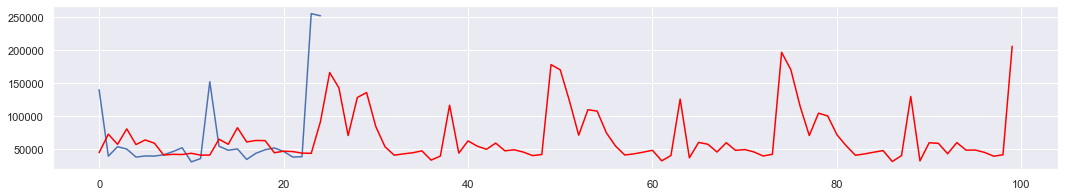

In [309]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test1)
plt.plot(predictions1, color='red')

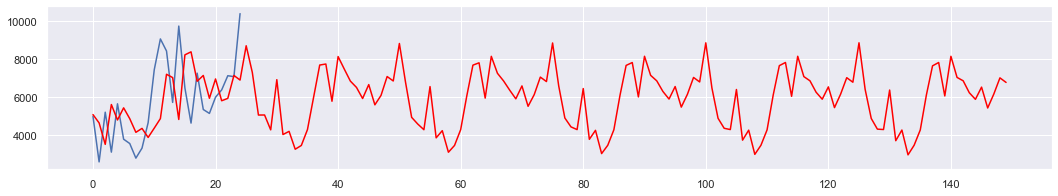

In [300]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test3)
plt.plot(predictions3, color='red')

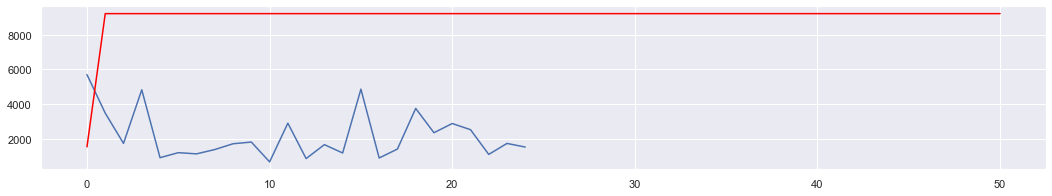

In [301]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test8)
plt.plot(predictions8, color='red')

### Grid Search ARIMA Model Hyperparameters

In [381]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [315]:
# evaluate parameters
p = 3
d = 1
q = 0
order = (p, d, q)
evaluate_arima_model(s1.values, order)

62733.81740638381

In [316]:
# evaluate parameters
p = 3
d = 1
q = 0
order = (p, d, q)
evaluate_arima_model(s3.values, order)

2033.2017483068105

In [317]:
# evaluate parameters
p = 3
d = 1
q = 0
order = (p, d, q)
evaluate_arima_model(s8.values, order)

1608.8347203893586

In [318]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [319]:
import warnings
warnings.filterwarnings("ignore")

In [320]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1]

evaluate_models(s1.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=64906.191
ARIMA(0, 0, 1) RMSE=67641.881
ARIMA(0, 1, 0) RMSE=60600.327
ARIMA(0, 1, 1) RMSE=63383.574
ARIMA(1, 0, 0) RMSE=66898.339
ARIMA(1, 0, 1) RMSE=69260.942
ARIMA(1, 1, 0) RMSE=60805.505
ARIMA(1, 1, 1) RMSE=65659.169
ARIMA(2, 0, 0) RMSE=66666.658
ARIMA(2, 0, 1) RMSE=66357.345
ARIMA(2, 1, 0) RMSE=61591.322
ARIMA(2, 1, 1) RMSE=65343.082
Best ARIMA(0, 1, 0) RMSE=60600.327


In [321]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1]

evaluate_models(s3.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=3238.476
ARIMA(0, 0, 1) RMSE=2580.616
ARIMA(0, 1, 0) RMSE=2037.884
ARIMA(0, 1, 1) RMSE=1869.532
ARIMA(1, 0, 0) RMSE=2052.707
ARIMA(1, 0, 1) RMSE=2070.348
ARIMA(1, 1, 0) RMSE=1943.886
ARIMA(2, 0, 0) RMSE=2014.752
ARIMA(2, 1, 0) RMSE=1966.352
Best ARIMA(0, 1, 1) RMSE=1869.532


In [322]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1]

evaluate_models(s8.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1486.908
ARIMA(0, 0, 1) RMSE=1507.064
ARIMA(0, 1, 0) RMSE=1999.059
ARIMA(0, 1, 1) RMSE=1522.149
ARIMA(1, 0, 0) RMSE=1505.338
ARIMA(1, 1, 0) RMSE=1761.509
ARIMA(1, 1, 1) RMSE=1551.078
ARIMA(2, 0, 0) RMSE=1543.613
ARIMA(2, 1, 0) RMSE=1576.039
ARIMA(2, 1, 1) RMSE=1665.154
Best ARIMA(0, 0, 0) RMSE=1486.908


### Rolling Forecast with Selected ARIMA Model: Walk Forward Validation
##### Seleccionamos el ARIMA que mejor funcionó mejor, para nuestro modelo final.

In [382]:
### 1
# split into train and test sets
X = s1.values
size = int(len(X) * 0.66)
train1, test1 = X[0:size], X[size:len(X)]
history1 = [x for x in train1]
predictions1 = []

### 3
# split into train and test sets
X = s3.values
size = int(len(X) * 0.66)
train3, test3 = X[0:size], X[size:len(X)]
history3 = [x for x in train3]
predictions3 = []

### 8
# split into train and test sets
X = s8.values
size = int(len(X) * 0.66)
train8, test8 = X[0:size], X[size:len(X)]
history8 = [x for x in train8]
predictions8 = []

In [383]:
### 1
# walk-forward validation
for t in range(len(test1)):
    model = ARIMA(history1, order=(0,1,0))
    model_fit1 = model.fit(disp=0)
    output = model_fit1.forecast()
    yhat = output[0]
    predictions1.append(yhat)
    obs = test1[t]
    history1.append(obs)
    
    
### 3
# walk-forward validation
for t in range(len(test3)):
    model = ARIMA(history3, order=(0,1,1))
    model_fit3 = model.fit(disp=0)
    output = model_fit3.forecast()
    yhat = output[0]
    predictions3.append(yhat)
    obs = test3[t]
    history3.append(obs)
    
### 8
# walk-forward validation
for t in range(len(test8)):
    model = ARIMA(history8, order=(0,0,0))
    model_fit8 = model.fit(disp=0)
    output = model_fit8.forecast()
    yhat = output[0]
    predictions8.append(yhat)
    obs = test8[t]
    history8.append(obs)

In [384]:
### 1
# evaluate forecasts
rmse1 = np.sqrt(mean_squared_error(test1, predictions1))
print('Test RMSE: %.3f' % rmse1)

### 3
# evaluate forecasts
rmse3 = np.sqrt(mean_squared_error(test3, predictions3))
print('Test RMSE: %.3f' % rmse3)

### 8
# evaluate forecasts
rmse8 = np.sqrt(mean_squared_error(test8, predictions8))
print('Test RMSE: %.3f' % rmse8)

Test RMSE: 60600.327
Test RMSE: 1869.523
Test RMSE: 1486.908


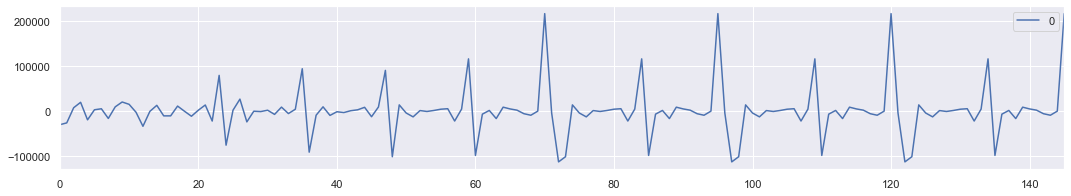

In [332]:
# line plot of residuals
residuals1 = pd.DataFrame(model_fit1.resid)
residuals1.plot()
plt.show()

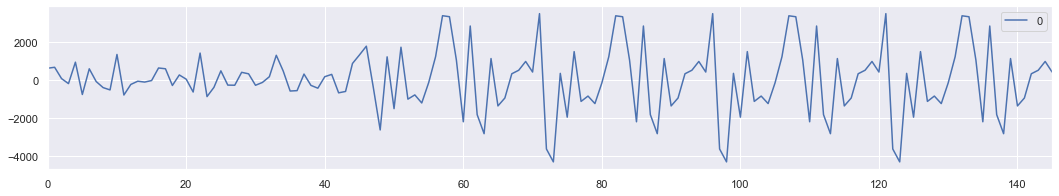

In [333]:
# line plot of residuals
residuals3 = pd.DataFrame(model_fit3.resid)
residuals3.plot()
plt.show()

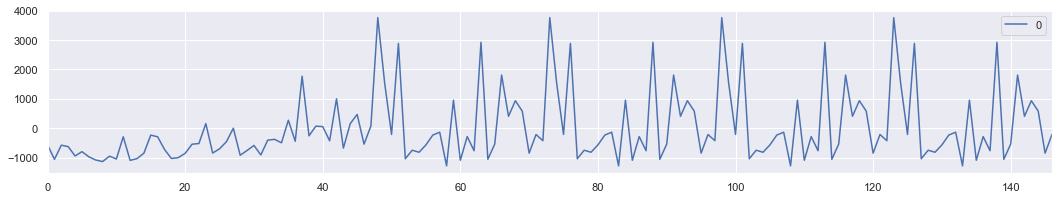

In [334]:
# line plot of residuals
residuals8 = pd.DataFrame(model_fit8.resid)
residuals8.plot()
plt.show()

[(-80000.0, 80000.0)]

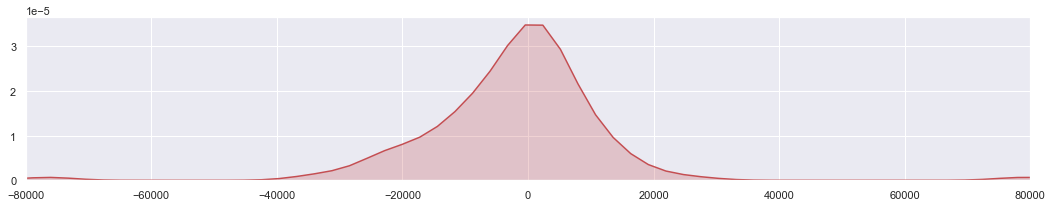

In [340]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals1.values), shade=True, color="r").set(xlim=(-80000, 80000))

[(-10000.0, 10000.0)]

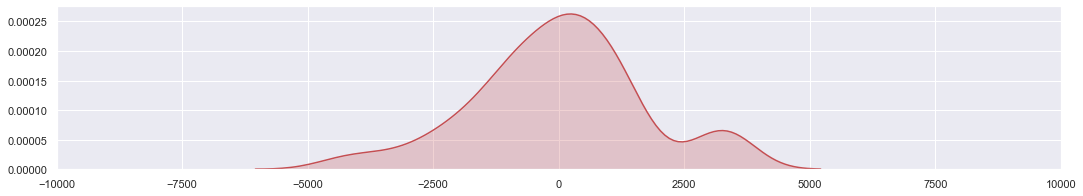

In [343]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals3.values), shade=True, color="r").set(xlim=(-10000, 10000))

[(-10000.0, 10000.0)]

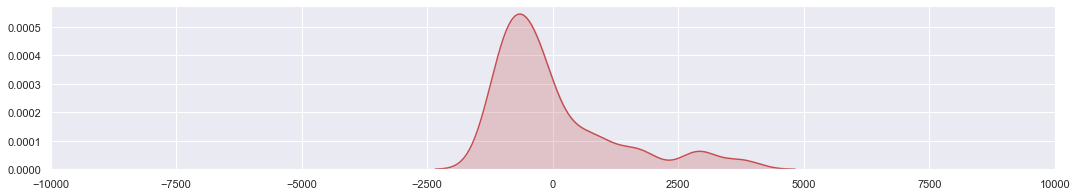

In [345]:
# density plot of residuals, using Seaborn kdeplot
sns.set(color_codes=True)
sns.kdeplot(np.hstack(residuals8.values), shade=True, color="r").set(xlim=(-10000, 10000))

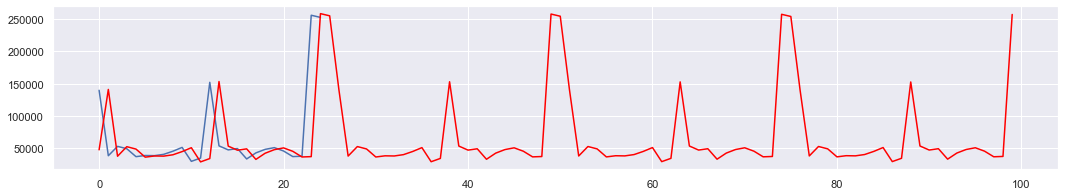

In [346]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test1)
plt.plot(predictions1, color='red')

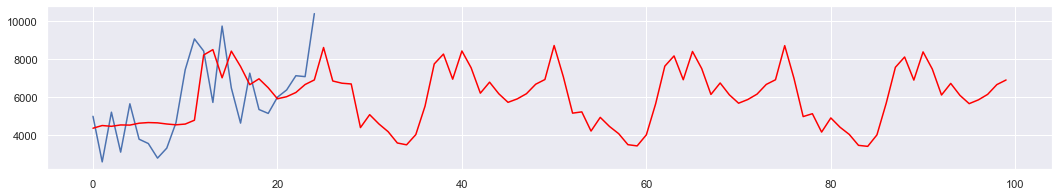

In [347]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test3)
plt.plot(predictions3, color='red')

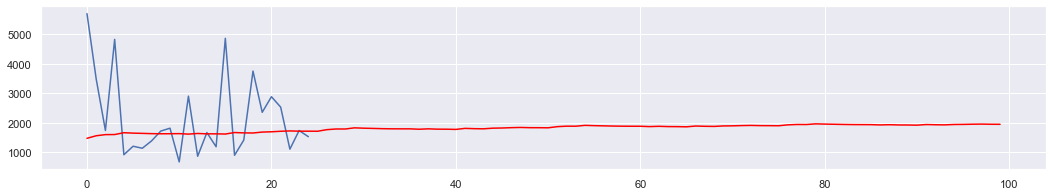

In [348]:
# plot forecasts against actual outcomes
plt.rc('figure', figsize=(18, 3))
plt.plot(test8)
plt.plot(predictions8, color='red')

### Verifiquemos qué parte de la serie de tiempo estábamos evaluando.

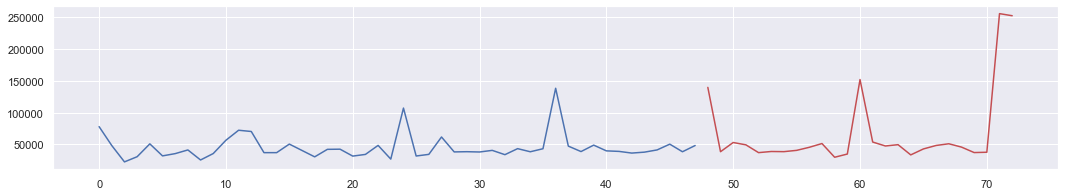

In [349]:
# plot train-test split of time series data
plt.plot(train1)
plt.plot([None for i in train1] + [x for x in test1], color='r')

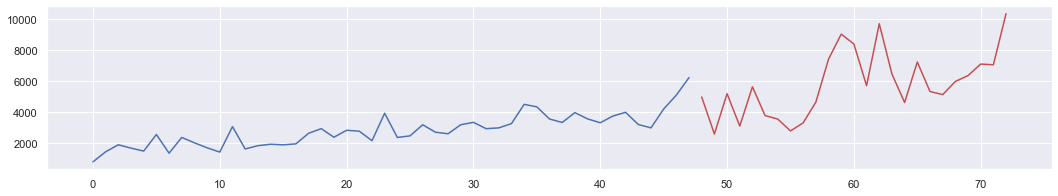

In [350]:
# plot train-test split of time series data
plt.plot(train3)
plt.plot([None for i in train3] + [x for x in test3], color='r')

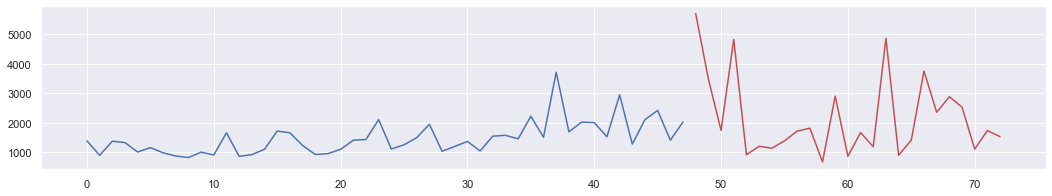

In [351]:
# plot train-test split of time series data
plt.plot(train8)
plt.plot([None for i in train8] + [x for x in test8], color='r')